# 上證指數漲跌停預測

Install required moduels      

    pip install numpy
    pip install scipy
    pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn import cross_validation

c:\users\hcche\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import peforth
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('000777.csv',encoding='gbk',parse_dates=[0],index_col=0)

In [5]:
# pdb.set_trace() # data 本來是新的在上面
df.sort_index(0,ascending=True,inplace=True) # 排序 sort 過後變成最舊的在上面

In [6]:
# data frame 中帶有 None 的 rows 都剔除掉。 
data = df.replace(to_replace='None', value=np.nan).dropna()  

In [7]:
# 上市第一天的資料不要，因為【漲跌幅】無效。
data = data.query('index > "1997-07-10"')

In [56]:
# raw data has 20 years long, but here only analysis the last 150 days of a chosen day
dayfeature=150
dayforesee=5  # 問未來幾天如何如何，最後就要扣掉幾天，避免 out of bounds. 0 代表當天。
featurenum=5*dayfeature  # 取五個有關係的欄位，特徵值。
x=np.zeros((data.shape[0]-dayfeature-dayforesee,featurenum+1))
y=np.zeros((data.shape[0]-dayfeature-dayforesee));

In [57]:
# 重疊 shift 150 天的五個「行情數目」加上下一天的開盤 共 751 個「數目」當作 feature X 

for i in range(0,data.shape[0]-dayfeature-dayforesee):
    x[i,0:featurenum]=np.array(data[i:i+dayfeature] \
          [[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum))
    # x[i,featurenum]=data.ix[i+dayfeature][u'开盘价']  # ix deprecated
    x[i,featurenum]=data.iloc[i+dayfeature][u'开盘价']

# 這裡設定要問 AI 的題目

In [48]:
# 預測當天是否會「漲停」?

# data.shape[0]-dayfeature 是 4489 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4488, 751)
# dayfeature 是 150 
# 直接看【涨跌幅】> 9.8 就算漲停板

for i in range(0,data.shape[0]-dayfeature-dayforesee):
    if float(data.iloc[i+dayfeature][u'涨跌幅'])>=9.8:
        y[i]=1
    else:
        y[i]=0          

In [49]:
# 預測未來 7 天是否會「漲停」?

# data.shape[0]-dayfeature 是 4489 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4488, 751)
# dayfeature 是 150 
# 直接看【涨跌幅】> 9.8 就算漲停板

for i in range(0,data.shape[0]-dayfeature-dayforesee):
    y[i]=0              
    for j in range(7):
        if float(data.iloc[j+i+dayfeature][u'涨跌幅'])>=9.8:
            y[i]=1


In [32]:
# 預測未來 30 天是否會「漲停」?

# data.shape[0]-dayfeature 是 4489 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4488, 751)
# dayfeature 是 150 
# 直接看【涨跌幅】> 9.8 就算漲停板

for i in range(0,data.shape[0]-dayfeature-dayforesee):
    y[i]=0              
    for j in range(30):
        if float(data.iloc[j+i+dayfeature][u'涨跌幅'])>=9.8:
            y[i]=1


In [59]:
# 預測未來 5 天是否會「漲20%」?

# data.shape[0]-dayfeature 是 4489 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4488, 751)
# dayfeature 是 150 
# 

for i in range(0,data.shape[0]-dayfeature-dayforesee):
    y[i]=0              
    pi = float(data.iloc[i][u'收盘价'])
    for j in range(dayforesee):
        pi5 = float(data.iloc[j+i+dayfeature][u'最高价'])
        if (pi5-pi)/pi >= 0.20 :
            y[i]=1


# 這裡選用 classifier 

In [ ]:
# SVM
from sklearn import svm
clf=svm.SVC(kernel='poly')  # so what is SVM? See "11-提交-监督学习 - 课程导学.pdf"
result = []

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
result = []

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
result = []

In [60]:
# Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
result = []

# 訓練

In [61]:
for i in range(100):
    x_train, x_test, y_train, y_test = \
                cross_validation.train_test_split(x, y, test_size = 0.2)
    clf.fit(x_train, y_train)
    result.append(np.mean(y_test == clf.predict(x_test)))

### 預測隔天會不會【漲停】
用 Bayes 跑 1000 次來看，都有 85% 的正確率!

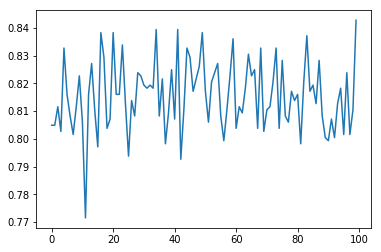

In [52]:
# Bayes classifier accuacy:
# Bayes1k = [0.8819599109131403, 0.88418708240534516, 0.88975501113585742, 0.88752783964365256, 0.89755011135857465, 0.88084632516703787, 0.86414253897550108, 0.87082405345211578, 0.87527839643652561, 0.87973273942093544, 0.89755011135857465, 0.87416481069042318, 0.87861915367483301, 0.86525612472160351, 0.88752783964365256, 0.88307349665924273, 0.87193763919821832, 0.88084632516703787, 0.89643652561247211, 0.87639198218262804, 0.85746102449888639, 0.85857461024498882, 0.89309576837416482, 0.85300668151447656, 0.87861915367483301, 0.87750556792873047, 0.87193763919821832, 0.85634743875278396, 0.86859688195991092, 0.84521158129175944, 0.88307349665924273, 0.8819599109131403, 0.86636971046770606, 0.89198218262806239, 0.88307349665924273, 0.87305122494432075, 0.86191536748329622, 0.87527839643652561, 0.87639198218262804, 0.88752783964365256, 0.86414253897550108, 0.86525612472160351, 0.88641425389755013, 0.88307349665924273, 0.8819599109131403, 0.88864142538975499, 0.86080178173719379, 0.89198218262806239, 0.8819599109131403, 0.87416481069042318, 0.87639198218262804, 0.87527839643652561, 0.8853006681514477, 0.86636971046770606, 0.88418708240534516, 0.88752783964365256, 0.86191536748329622, 0.86302895322939865, 0.87305122494432075, 0.87082405345211578, 0.85857461024498882, 0.84855233853006684, 0.85968819599109136, 0.86414253897550108, 0.8853006681514477, 0.86302895322939865, 0.87527839643652561, 0.87416481069042318, 0.88975501113585742, 0.88864142538975499, 0.85189309576837413, 0.87750556792873047, 0.87527839643652561, 0.89198218262806239, 0.87416481069042318, 0.89086859688195996, 0.87416481069042318, 0.86859688195991092, 0.87750556792873047, 0.90089086859688194, 0.87639198218262804, 0.87527839643652561, 0.87305122494432075, 0.87639198218262804, 0.86414253897550108, 0.87973273942093544, 0.85857461024498882, 0.87861915367483301, 0.86414253897550108, 0.87305122494432075, 0.88307349665924273, 0.8853006681514477, 0.87639198218262804, 0.87416481069042318, 0.85968819599109136, 0.87416481069042318, 0.86302895322939865, 0.88418708240534516, 0.8507795100222717, 0.88975501113585742, 0.8819599109131403, 0.88752783964365256, 0.89086859688195996, 0.86971046770601335, 0.87193763919821832, 0.87416481069042318, 0.87973273942093544, 0.88418708240534516, 0.87305122494432075, 0.85857461024498882, 0.86414253897550108, 0.88307349665924273, 0.86971046770601335, 0.87639198218262804, 0.85634743875278396, 0.87193763919821832, 0.83853006681514475, 0.87639198218262804, 0.87750556792873047, 0.88307349665924273, 0.87750556792873047, 0.88864142538975499, 0.85857461024498882, 0.87861915367483301, 0.85857461024498882, 0.86414253897550108, 0.87527839643652561, 0.86080178173719379, 0.86302895322939865, 0.87416481069042318, 0.87416481069042318, 0.87639198218262804, 0.87750556792873047, 0.88752783964365256, 0.87527839643652561, 0.88307349665924273, 0.87527839643652561, 0.91425389755011133, 0.86971046770601335, 0.88418708240534516, 0.86302895322939865, 0.85857461024498882, 0.87639198218262804, 0.89420935412026725, 0.87305122494432075, 0.87639198218262804, 0.85857461024498882, 0.89420935412026725, 0.87750556792873047, 0.86191536748329622, 0.87193763919821832, 0.87639198218262804, 0.87193763919821832, 0.87082405345211578, 0.86636971046770606, 0.87750556792873047, 0.87639198218262804, 0.85968819599109136, 0.8853006681514477, 0.86636971046770606, 0.88975501113585742, 0.89420935412026725, 0.86636971046770606, 0.87973273942093544, 0.8853006681514477, 0.86080178173719379, 0.87193763919821832, 0.89532293986636968, 0.8853006681514477, 0.88084632516703787, 0.86191536748329622, 0.87639198218262804, 0.87861915367483301, 0.87750556792873047, 0.8819599109131403, 0.88418708240534516, 0.86748329621380849, 0.87973273942093544, 0.86859688195991092, 0.92093541202672602, 0.86636971046770606, 0.87973273942093544, 0.87082405345211578, 0.88641425389755013, 0.86080178173719379, 0.87750556792873047, 0.86414253897550108, 0.88975501113585742, 0.86191536748329622, 0.88418708240534516, 0.88307349665924273, 0.86748329621380849, 0.86748329621380849, 0.89198218262806239, 0.89198218262806239, 0.86525612472160351, 0.87639198218262804, 0.87527839643652561, 0.86080178173719379, 0.85189309576837413, 0.89086859688195996, 0.85189309576837413, 0.87305122494432075, 0.8853006681514477, 0.9031180400890868, 0.88307349665924273, 0.86859688195991092, 0.87082405345211578, 0.87750556792873047, 0.86414253897550108, 0.87973273942093544, 0.87416481069042318, 0.87305122494432075, 0.87193763919821832, 0.88975501113585742, 0.87193763919821832, 0.89643652561247211, 0.87082405345211578, 0.86748329621380849, 0.87973273942093544, 0.86525612472160351, 0.88975501113585742, 0.87861915367483301, 0.85300668151447656, 0.87750556792873047, 0.87416481069042318, 0.87416481069042318, 0.88307349665924273, 0.86971046770601335, 0.87416481069042318, 0.87527839643652561, 0.87193763919821832, 0.87082405345211578, 0.85523385300668153, 0.86414253897550108, 0.8853006681514477, 0.87082405345211578, 0.88084632516703787, 0.8819599109131403, 0.87973273942093544, 0.85857461024498882, 0.87639198218262804, 0.87973273942093544, 0.87639198218262804, 0.88641425389755013, 0.86191536748329622, 0.8853006681514477, 0.87973273942093544, 0.89420935412026725, 0.87861915367483301, 0.87193763919821832, 0.8853006681514477, 0.89643652561247211, 0.87082405345211578, 0.86971046770601335, 0.86525612472160351, 0.88864142538975499, 0.87193763919821832, 0.86302895322939865, 0.88418708240534516, 0.87750556792873047, 0.87305122494432075, 0.88975501113585742, 0.86414253897550108, 0.85968819599109136, 0.89198218262806239, 0.87973273942093544, 0.86414253897550108, 0.88084632516703787, 0.85968819599109136, 0.84743875278396441, 0.87082405345211578, 0.86859688195991092, 0.87527839643652561, 0.86859688195991092, 0.85857461024498882, 0.88752783964365256, 0.87750556792873047, 0.8507795100222717, 0.84966592427616927, 0.89420935412026725, 0.87750556792873047, 0.89086859688195996, 0.86748329621380849, 0.88975501113585742, 0.89086859688195996, 0.87750556792873047, 0.87527839643652561, 0.86525612472160351, 0.88084632516703787, 0.88307349665924273, 0.86302895322939865, 0.88641425389755013, 0.86636971046770606, 0.86414253897550108, 0.88641425389755013, 0.88418708240534516, 0.89086859688195996, 0.86971046770601335, 0.86302895322939865, 0.88975501113585742, 0.85746102449888639, 0.87973273942093544, 0.87861915367483301, 0.87861915367483301, 0.88752783964365256, 0.86748329621380849, 0.87973273942093544, 0.87973273942093544, 0.87305122494432075, 0.87750556792873047, 0.86414253897550108, 0.87973273942093544, 0.88418708240534516, 0.85634743875278396, 0.85857461024498882, 0.8541202672605791, 0.86859688195991092, 0.87527839643652561, 0.86302895322939865, 0.87750556792873047, 0.88307349665924273, 0.86525612472160351, 0.88084632516703787, 0.87639198218262804, 0.88084632516703787, 0.88418708240534516, 0.87527839643652561, 0.87973273942093544, 0.88084632516703787, 0.89866369710467708, 0.87416481069042318, 0.87639198218262804, 0.8853006681514477, 0.90979955456570161, 0.86748329621380849, 0.88084632516703787, 0.87639198218262804, 0.87639198218262804, 0.86748329621380849, 0.89198218262806239, 0.89420935412026725, 0.86971046770601335, 0.86971046770601335, 0.87861915367483301, 0.85523385300668153, 0.86302895322939865, 0.87973273942093544, 0.86302895322939865, 0.87861915367483301, 0.87639198218262804, 0.86080178173719379, 0.85746102449888639, 0.87973273942093544, 0.88975501113585742, 0.87193763919821832, 0.88752783964365256, 0.87973273942093544, 0.87861915367483301, 0.88975501113585742, 0.86302895322939865, 0.87527839643652561, 0.89532293986636968, 0.84966592427616927, 0.88084632516703787, 0.87416481069042318, 0.88641425389755013, 0.85300668151447656, 0.87527839643652561, 0.87973273942093544, 0.86971046770601335, 0.88418708240534516, 0.86525612472160351, 0.87527839643652561, 0.87416481069042318, 0.88864142538975499, 0.89086859688195996, 0.87750556792873047, 0.87639198218262804, 0.88752783964365256, 0.86191536748329622, 0.88752783964365256, 0.86971046770601335, 0.86302895322939865, 0.88307349665924273, 0.86859688195991092, 0.88307349665924273, 0.87527839643652561, 0.87416481069042318, 0.8819599109131403, 0.88307349665924273, 0.86191536748329622, 0.87750556792873047, 0.88641425389755013, 0.88084632516703787, 0.9031180400890868, 0.86971046770601335, 0.8819599109131403, 0.85746102449888639, 0.85857461024498882, 0.89866369710467708, 0.85857461024498882, 0.88307349665924273, 0.85968819599109136, 0.8819599109131403, 0.88752783964365256, 0.88418708240534516, 0.88641425389755013, 0.87193763919821832, 0.86748329621380849, 0.87416481069042318, 0.89309576837416482, 0.86971046770601335, 0.86080178173719379, 0.86971046770601335, 0.89086859688195996, 0.86859688195991092, 0.87527839643652561, 0.86191536748329622, 0.86525612472160351, 0.88641425389755013, 0.86748329621380849, 0.87973273942093544, 0.88864142538975499, 0.89420935412026725, 0.89198218262806239, 0.88307349665924273, 0.89532293986636968, 0.88307349665924273, 0.87639198218262804, 0.86302895322939865, 0.88084632516703787, 0.86080178173719379, 0.8853006681514477, 0.87527839643652561, 0.89755011135857465, 0.85746102449888639, 0.84966592427616927, 0.87416481069042318, 0.86971046770601335, 0.86414253897550108, 0.88641425389755013, 0.86414253897550108, 0.87305122494432075, 0.87750556792873047, 0.90423162583518935, 0.87416481069042318, 0.87527839643652561, 0.87082405345211578, 0.89532293986636968, 0.88641425389755013, 0.87973273942093544, 0.85634743875278396, 0.86191536748329622, 0.9164810690423163, 0.8853006681514477, 0.87527839643652561, 0.87861915367483301, 0.84743875278396441, 0.87861915367483301, 0.86748329621380849, 0.86859688195991092, 0.86191536748329622, 0.8819599109131403, 0.86191536748329622, 0.87861915367483301, 0.86302895322939865, 0.8819599109131403, 0.87639198218262804, 0.86859688195991092, 0.87082405345211578, 0.83853006681514475, 0.86414253897550108, 0.87527839643652561, 0.87639198218262804, 0.86971046770601335, 0.86080178173719379, 0.86525612472160351, 0.87305122494432075, 0.87416481069042318, 0.87082405345211578, 0.88307349665924273, 0.87527839643652561, 0.8507795100222717, 0.87193763919821832, 0.89420935412026725, 0.87973273942093544, 0.8819599109131403, 0.86636971046770606, 0.89420935412026725, 0.88418708240534516, 0.87193763919821832, 0.87861915367483301, 0.86859688195991092, 0.88864142538975499, 0.86859688195991092, 0.8819599109131403, 0.87305122494432075, 0.87750556792873047, 0.88307349665924273, 0.88864142538975499, 0.88975501113585742, 0.87639198218262804, 0.87082405345211578, 0.87973273942093544, 0.87193763919821832, 0.87861915367483301, 0.88084632516703787, 0.86859688195991092, 0.87973273942093544, 0.88084632516703787, 0.88975501113585742, 0.88641425389755013, 0.88084632516703787, 0.87750556792873047, 0.87416481069042318, 0.87193763919821832, 0.8819599109131403, 0.87305122494432075, 0.87750556792873047, 0.87973273942093544, 0.86859688195991092, 0.87416481069042318, 0.87193763919821832, 0.85857461024498882, 0.87750556792873047, 0.87639198218262804, 0.88418708240534516, 0.85746102449888639, 0.87193763919821832, 0.87527839643652561, 0.88418708240534516, 0.86748329621380849, 0.86525612472160351, 0.88641425389755013, 0.87305122494432075, 0.88752783964365256, 0.88975501113585742, 0.85523385300668153, 0.86525612472160351, 0.88975501113585742, 0.88641425389755013, 0.85189309576837413, 0.88641425389755013, 0.86971046770601335, 0.88418708240534516, 0.87639198218262804, 0.88864142538975499, 0.87861915367483301, 0.90979955456570161, 0.88752783964365256, 0.84298440979955458, 0.88084632516703787, 0.86859688195991092, 0.86971046770601335, 0.88084632516703787, 0.87305122494432075, 0.89198218262806239, 0.86302895322939865, 0.90200445434298437, 0.87750556792873047, 0.86636971046770606, 0.87750556792873047, 0.87305122494432075, 0.89420935412026725, 0.86971046770601335, 0.87305122494432075, 0.83296213808463249, 0.87305122494432075, 0.86636971046770606, 0.87082405345211578, 0.8819599109131403, 0.89198218262806239, 0.87193763919821832, 0.86302895322939865, 0.8819599109131403, 0.8819599109131403, 0.86414253897550108, 0.86971046770601335, 0.86525612472160351, 0.87193763919821832, 0.85968819599109136, 0.87305122494432075, 0.88418708240534516, 0.87750556792873047, 0.87750556792873047, 0.87416481069042318, 0.88084632516703787, 0.86971046770601335, 0.87193763919821832, 0.88975501113585742, 0.86414253897550108, 0.87750556792873047, 0.88641425389755013, 0.88307349665924273, 0.87527839643652561, 0.89198218262806239, 0.88084632516703787, 0.84632516703786187, 0.88307349665924273, 0.87527839643652561, 0.88307349665924273, 0.8819599109131403, 0.87639198218262804, 0.86302895322939865, 0.90645879732739421, 0.88752783964365256, 0.87527839643652561, 0.88752783964365256, 0.88752783964365256, 0.88864142538975499, 0.86414253897550108, 0.87750556792873047, 0.86525612472160351, 0.89309576837416482, 0.8819599109131403, 0.87861915367483301, 0.86636971046770606, 0.9031180400890868, 0.86191536748329622, 0.88752783964365256, 0.88084632516703787, 0.87527839643652561, 0.87639198218262804, 0.87639198218262804, 0.86080178173719379, 0.87639198218262804, 0.86636971046770606, 0.88641425389755013, 0.86525612472160351, 0.89309576837416482, 0.87193763919821832, 0.89755011135857465, 0.89309576837416482, 0.87750556792873047, 0.88641425389755013, 0.88641425389755013, 0.87527839643652561, 0.87193763919821832, 0.88641425389755013, 0.86525612472160351, 0.87750556792873047, 0.86414253897550108, 0.86748329621380849, 0.8507795100222717, 0.8819599109131403, 0.87639198218262804, 0.87193763919821832, 0.85189309576837413, 0.87193763919821832, 0.86191536748329622, 0.86080178173719379, 0.87639198218262804, 0.87750556792873047, 0.87750556792873047, 0.88307349665924273, 0.8819599109131403, 0.88864142538975499, 0.89198218262806239, 0.8853006681514477, 0.85634743875278396, 0.86191536748329622, 0.87416481069042318, 0.87416481069042318, 0.87750556792873047, 0.88864142538975499, 0.88418708240534516, 0.88641425389755013, 0.85746102449888639, 0.87082405345211578, 0.87305122494432075, 0.87305122494432075, 0.87527839643652561, 0.86971046770601335, 0.87750556792873047, 0.87639198218262804, 0.89198218262806239, 0.87193763919821832, 0.86636971046770606, 0.86414253897550108, 0.88418708240534516, 0.87416481069042318, 0.86859688195991092, 0.87861915367483301, 0.88307349665924273, 0.87527839643652561, 0.87861915367483301, 0.87305122494432075, 0.89198218262806239, 0.87750556792873047, 0.86080178173719379, 0.86302895322939865, 0.87193763919821832, 0.88307349665924273, 0.88752783964365256, 0.87305122494432075, 0.87861915367483301, 0.87193763919821832, 0.88084632516703787, 0.86525612472160351, 0.87861915367483301, 0.88864142538975499, 0.86525612472160351, 0.87193763919821832, 0.86971046770601335, 0.87416481069042318, 0.89643652561247211, 0.87416481069042318, 0.86859688195991092, 0.87082405345211578, 0.85746102449888639, 0.87082405345211578, 0.86859688195991092, 0.86525612472160351, 0.87973273942093544, 0.87750556792873047, 0.86748329621380849, 0.87639198218262804, 0.86525612472160351, 0.86971046770601335, 0.86414253897550108, 0.90200445434298437, 0.86971046770601335, 0.89755011135857465, 0.87750556792873047, 0.87305122494432075, 0.88975501113585742, 0.90089086859688194, 0.87527839643652561, 0.89198218262806239, 0.86859688195991092, 0.87305122494432075, 0.86636971046770606, 0.88307349665924273, 0.88418708240534516, 0.86636971046770606, 0.87861915367483301, 0.86636971046770606, 0.87750556792873047, 0.86748329621380849, 0.85968819599109136, 0.8853006681514477, 0.88084632516703787, 0.91202672605790647, 0.87305122494432075, 0.85523385300668153, 0.8819599109131403, 0.85968819599109136, 0.87305122494432075, 0.88752783964365256, 0.87750556792873047, 0.86636971046770606, 0.88418708240534516, 0.87416481069042318, 0.85857461024498882, 0.88418708240534516, 0.8853006681514477, 0.86859688195991092, 0.86859688195991092, 0.87193763919821832, 0.86636971046770606, 0.86859688195991092, 0.86859688195991092, 0.88084632516703787, 0.88084632516703787, 0.87305122494432075, 0.87416481069042318, 0.87973273942093544, 0.86748329621380849, 0.87193763919821832, 0.90089086859688194, 0.89309576837416482, 0.88084632516703787, 0.86525612472160351, 0.87416481069042318, 0.87973273942093544, 0.88864142538975499, 0.89643652561247211, 0.88752783964365256, 0.85634743875278396, 0.86080178173719379, 0.8819599109131403, 0.86191536748329622, 0.87416481069042318, 0.87861915367483301, 0.85857461024498882, 0.87082405345211578, 0.90200445434298437, 0.87193763919821832, 0.86414253897550108, 0.88752783964365256, 0.8819599109131403, 0.87305122494432075, 0.85746102449888639, 0.91202672605790647, 0.87861915367483301, 0.89532293986636968, 0.86414253897550108, 0.88307349665924273, 0.87861915367483301, 0.85300668151447656, 0.88084632516703787, 0.87527839643652561, 0.87861915367483301, 0.87416481069042318, 0.87973273942093544, 0.83407572383073492, 0.87639198218262804, 0.8853006681514477, 0.87973273942093544, 0.86525612472160351, 0.87861915367483301, 0.88752783964365256, 0.85634743875278396, 0.88418708240534516, 0.88307349665924273, 0.87305122494432075, 0.88864142538975499, 0.86636971046770606, 0.89532293986636968, 0.86525612472160351, 0.85857461024498882, 0.87305122494432075, 0.87416481069042318, 0.90423162583518935, 0.86859688195991092, 0.88752783964365256, 0.8819599109131403, 0.86525612472160351, 0.86748329621380849, 0.87861915367483301, 0.88975501113585742, 0.86971046770601335, 0.86302895322939865, 0.89755011135857465, 0.90979955456570161, 0.88307349665924273, 0.85857461024498882, 0.86971046770601335, 0.86748329621380849, 0.88084632516703787, 0.88752783964365256, 0.86636971046770606, 0.88864142538975499, 0.86080178173719379, 0.87639198218262804, 0.87973273942093544, 0.88752783964365256, 0.88307349665924273, 0.87082405345211578, 0.89309576837416482, 0.87639198218262804, 0.88752783964365256, 0.86414253897550108, 0.86080178173719379, 0.8541202672605791, 0.87082405345211578, 0.8819599109131403, 0.8819599109131403, 0.87416481069042318, 0.87750556792873047, 0.87082405345211578, 0.8853006681514477, 0.88307349665924273, 0.85523385300668153, 0.73719376391982183, 0.86302895322939865, 0.87973273942093544, 0.89420935412026725, 0.87861915367483301, 0.87193763919821832, 0.88307349665924273, 0.87305122494432075, 0.88641425389755013, 0.88975501113585742, 0.89755011135857465, 0.85523385300668153, 0.86859688195991092, 0.89420935412026725, 0.87861915367483301, 0.89420935412026725, 0.88752783964365256, 0.87416481069042318, 0.88084632516703787, 0.86859688195991092, 0.88084632516703787, 0.87973273942093544, 0.89198218262806239, 0.87639198218262804, 0.86748329621380849, 0.86748329621380849, 0.85968819599109136, 0.8853006681514477, 0.88084632516703787, 0.8853006681514477, 0.88975501113585742, 0.86859688195991092, 0.88084632516703787, 0.87416481069042318, 0.87305122494432075, 0.87750556792873047, 0.88752783964365256, 0.86414253897550108, 0.87973273942093544, 0.87639198218262804, 0.88084632516703787, 0.85634743875278396, 0.87750556792873047, 0.87193763919821832, 0.86859688195991092, 0.88975501113585742, 0.8819599109131403, 0.87750556792873047, 0.85968819599109136, 0.87639198218262804, 0.88418708240534516, 0.88641425389755013, 0.87639198218262804, 0.87639198218262804, 0.86748329621380849, 0.89086859688195996, 0.88975501113585742, 0.86080178173719379, 0.87305122494432075, 0.86859688195991092, 0.87639198218262804, 0.88975501113585742, 0.87193763919821832, 0.87639198218262804, 0.87527839643652561, 0.87527839643652561, 0.86748329621380849, 0.86525612472160351, 0.88975501113585742, 0.86636971046770606, 0.87750556792873047, 0.88084632516703787, 0.88418708240534516, 0.87750556792873047, 0.88084632516703787, 0.87639198218262804, 0.86525612472160351, 0.89309576837416482, 0.89755011135857465, 0.87527839643652561, 0.84075723830734972, 0.8541202672605791, 0.86748329621380849, 0.86414253897550108, 0.88418708240534516, 0.85968819599109136, 0.87193763919821832, 0.89086859688195996, 0.88864142538975499, 0.8819599109131403, 0.87193763919821832, 0.87527839643652561, 0.86636971046770606, 0.88752783964365256, 0.87416481069042318, 0.87861915367483301, 0.87193763919821832, 0.88084632516703787, 0.87416481069042318, 0.86080178173719379, 0.8819599109131403, 0.86191536748329622, 0.86302895322939865, 0.87973273942093544, 0.87973273942093544, 0.87527839643652561, 0.8853006681514477, 0.8853006681514477, 0.89420935412026725, 0.89198218262806239, 0.85857461024498882, 0.86636971046770606, 0.8853006681514477, 0.87639198218262804, 0.89198218262806239, 0.87639198218262804, 0.8853006681514477, 0.87416481069042318, 0.86525612472160351, 0.8819599109131403, 0.87193763919821832, 0.88864142538975499, 0.87973273942093544, 0.86191536748329622, 0.88752783964365256, 0.88752783964365256, 0.86191536748329622, 0.86748329621380849, 0.86636971046770606, 0.88641425389755013, 0.86971046770601335, 0.88084632516703787, 0.88307349665924273, 0.87973273942093544, 0.87973273942093544, 0.87973273942093544, 0.87082405345211578, 0.85746102449888639, 0.87305122494432075, 0.88864142538975499, 0.86971046770601335, 0.87750556792873047, 0.85523385300668153, 0.86748329621380849, 0.87193763919821832, 0.8853006681514477, 0.86191536748329622, 0.87750556792873047, 0.87861915367483301, 0.86859688195991092, 0.88864142538975499, 0.89866369710467708, 0.86971046770601335, 0.86748329621380849, 0.86859688195991092, 0.87416481069042318, 0.89309576837416482, 0.8853006681514477, 0.87639198218262804, 0.87639198218262804, 0.87639198218262804, 0.88418708240534516, 0.87082405345211578, 0.87861915367483301, 0.85189309576837413, 0.8819599109131403, 0.88418708240534516, 0.89086859688195996, 0.87416481069042318, 0.86748329621380849, 0.88307349665924273, 0.85857461024498882, 0.88307349665924273, 0.89198218262806239, 0.87973273942093544, 0.87750556792873047, 0.88864142538975499, 0.86191536748329622, 0.88418708240534516, 0.87750556792873047, 0.87639198218262804, 0.86636971046770606, 0.8541202672605791, 0.86859688195991092, 0.87082405345211578, 0.87193763919821832, 0.88418708240534516, 0.87861915367483301, 0.88864142538975499, 0.86080178173719379, 0.87861915367483301, 0.8819599109131403, 0.87082405345211578, 0.8819599109131403, 0.86525612472160351, 0.83073496659242763, 0.87973273942093544, 0.88418708240534516, 0.87305122494432075, 0.86302895322939865, 0.88418708240534516, 0.87750556792873047, 0.88752783964365256, 0.86302895322939865, 0.88752783964365256, 0.86748329621380849, 0.8507795100222717, 0.87193763919821832, 0.90089086859688194, 0.89420935412026725, 0.87082405345211578, 0.87973273942093544, 0.86525612472160351, 0.88641425389755013, 0.87082405345211578, 0.88864142538975499, 0.88307349665924273, 0.89755011135857465, 0.85523385300668153, 0.86302895322939865, 0.89532293986636968, 0.88084632516703787, 0.87639198218262804, 0.89198218262806239, 0.87973273942093544, 0.86525612472160351, 0.86525612472160351, 0.89086859688195996, 0.87861915367483301, 0.89755011135857465, 0.87527839643652561, 0.88307349665924273, 0.88752783964365256, 0.87193763919821832, 0.86191536748329622]
# plot(Bayes1k)
plot(result)

In [53]:
y_pre = clf.predict(x)  # 讓 AI 看新的資料，產生新的 tags
%f __main__ :> y_pre py> sum(pop()) . cr
%f __main__ :> y     py> sum(pop()) . cr
%f __main__ :> y_pre[:20] . cr
%f __main__ :> y[:20] . cr
%f __main__ :> y_pre[20] . cr
%f __main__ :> y[20] . cr
    

533.0
467.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
0.0


In [54]:
# 查看 AI 預測的結果，與人工 tag 比較。
categories = [0,0,0,0]
for i in range(y.shape[0]): 
    if int(y_pre[i])==int(y[i]) and int(y[i])==0: categories[0]+=1; continue
    if int(y_pre[i])!=int(y[i]) and int(y[i])==1: categories[1]+=1; continue
    if int(y_pre[i])!=int(y[i]) and int(y[i])==0: categories[2]+=1; continue
    if int(y_pre[i])==int(y[i]) and int(y[i])==1: categories[3]+=1; continue
%f __main__ :> categories ( 沒事的，漏掉的，多的，一致的 ) tib.

__main__ :> categories ( 沒事的，漏掉的，多的，一致的 ) tib. \ ==> [3575, 373, 439, 94] (<class 'list'>)


### 預測未來 7 天會不會【漲停】
用 Bayes 跑 2000 次來看，正確率降了!

In [ ]:
# Bayes classifier accuacy:
Bayes2k = [0.79152731326644366, 0.80824972129319961, 0.80267558528428096, 0.82051282051282048, 0.82831661092530662, 0.80602006688963213, 0.81159420289855078, 0.81382385730211815, 0.82385730211817165, 0.8193979933110368, 0.81382385730211815, 0.81828316610925311, 0.81159420289855078, 0.80044593088071347, 0.81716833890746932, 0.83277591973244147, 0.81493868450390194, 0.80379041248606464, 0.82497212931995545, 0.81605351170568563, 0.79710144927536231, 0.81605351170568563, 0.80156075808249716, 0.83054626532887399, 0.82274247491638797, 0.80379041248606464, 0.82608695652173914, 0.79041248606465997, 0.82385730211817165, 0.82497212931995545, 0.83389074693422516, 0.81159420289855078, 0.83389074693422516, 0.83277591973244147, 0.84280936454849498, 0.79710144927536231, 0.82385730211817165, 0.83054626532887399, 0.83946488294314381, 0.8193979933110368, 0.81828316610925311, 0.79710144927536231, 0.82831661092530662, 0.80936454849498329, 0.81382385730211815, 0.81828316610925311, 0.80713489409141581, 0.82608695652173914, 0.82051282051282048, 0.80824972129319961, 0.80379041248606464, 0.80267558528428096, 0.81828316610925311, 0.81716833890746932, 0.8193979933110368, 0.83054626532887399, 0.82608695652173914, 0.81605351170568563, 0.8294314381270903, 0.79933110367892979, 0.79487179487179482, 0.81493868450390194, 0.82162764771460428, 0.8294314381270903, 0.82274247491638797, 0.82385730211817165, 0.82051282051282048, 0.8294314381270903, 0.83612040133779264, 0.84503901895206246, 0.83277591973244147, 0.82385730211817165, 0.83277591973244147, 0.81047937569676698, 0.81493868450390194, 0.79375696767001114, 0.80267558528428096, 0.82162764771460428, 0.82385730211817165, 0.82274247491638797, 0.81828316610925311, 0.82608695652173914, 0.81270903010033446, 0.82385730211817165, 0.82385730211817165, 0.79933110367892979, 0.81047937569676698, 0.80936454849498329, 0.79933110367892979, 0.81047937569676698, 0.80936454849498329, 0.82274247491638797, 0.82162764771460428, 0.81828316610925311, 0.82831661092530662, 0.8294314381270903, 0.82274247491638797, 0.81493868450390194, 0.83723522853957633, 0.80824972129319961, 0.8294314381270903, 0.81493868450390194, 0.81605351170568563, 0.82385730211817165, 0.82720178372352282, 0.83835005574136012, 0.82831661092530662, 0.83054626532887399, 0.82608695652173914, 0.83166109253065779, 0.82162764771460428, 0.80713489409141581, 0.81159420289855078, 0.82497212931995545, 0.81159420289855078, 0.82274247491638797, 0.81047937569676698, 0.81047937569676698, 0.81828316610925311, 0.81605351170568563, 0.81716833890746932, 0.79487179487179482, 0.82051282051282048, 0.8294314381270903, 0.80267558528428096, 0.79821627647714599, 0.80936454849498329, 0.81270903010033446, 0.81382385730211815, 0.83500557413600895, 0.81159420289855078, 0.81159420289855078, 0.81382385730211815, 0.82051282051282048, 0.81493868450390194, 0.81382385730211815, 0.83389074693422516, 0.83946488294314381, 0.8193979933110368, 0.82497212931995545, 0.78037904124860646, 0.84838350055741363, 0.82051282051282048, 0.81828316610925311, 0.81382385730211815, 0.80824972129319961, 0.79152731326644366, 0.80713489409141581, 0.82274247491638797, 0.83723522853957633, 0.81493868450390194, 0.80824972129319961, 0.81159420289855078, 0.83723522853957633, 0.79598662207357862, 0.81159420289855078, 0.80713489409141581, 0.81828316610925311, 0.83166109253065779, 0.81605351170568563, 0.80490523968784833, 0.83277591973244147, 0.80936454849498329, 0.82608695652173914, 0.78929765886287628, 0.80713489409141581, 0.82051282051282048, 0.79487179487179482, 0.81828316610925311, 0.79710144927536231, 0.82497212931995545, 0.83612040133779264, 0.81159420289855078, 0.8193979933110368, 0.83054626532887399, 0.83389074693422516, 0.83389074693422516, 0.82385730211817165, 0.80824972129319961, 0.82497212931995545, 0.83054626532887399, 0.80936454849498329, 0.82385730211817165, 0.80490523968784833, 0.81493868450390194, 0.82162764771460428, 0.8193979933110368, 0.83500557413600895, 0.84169453734671129, 0.82162764771460428, 0.83054626532887399, 0.81605351170568563, 0.77926421404682278, 0.84057971014492749, 0.83054626532887399, 0.81493868450390194, 0.83946488294314381, 0.80824972129319961, 0.84057971014492749, 0.81716833890746932, 0.82608695652173914, 0.82608695652173914, 0.82051282051282048, 0.79598662207357862, 0.82608695652173914, 0.81716833890746932, 0.80602006688963213, 0.81382385730211815, 0.8294314381270903, 0.83054626532887399, 0.81493868450390194, 0.83835005574136012, 0.80824972129319961, 0.79487179487179482, 0.81047937569676698, 0.80824972129319961, 0.78372352285395763, 0.84169453734671129, 0.82608695652173914, 0.82608695652173914, 0.80824972129319961, 0.79821627647714599, 0.80824972129319961, 0.80490523968784833, 0.82385730211817165, 0.82051282051282048, 0.82051282051282048, 0.8193979933110368, 0.81382385730211815, 0.83723522853957633, 0.81716833890746932, 0.82720178372352282, 0.8193979933110368, 0.80379041248606464, 0.83277591973244147, 0.80936454849498329, 0.82385730211817165, 0.81605351170568563, 0.79487179487179482, 0.8193979933110368, 0.82162764771460428, 0.83500557413600895, 0.81828316610925311, 0.83277591973244147, 0.82497212931995545, 0.78149386845039015, 0.82831661092530662, 0.81716833890746932, 0.82162764771460428, 0.81493868450390194, 0.80267558528428096, 0.83946488294314381, 0.81270903010033446, 0.83277591973244147, 0.82051282051282048, 0.80044593088071347, 0.81382385730211815, 0.84169453734671129, 0.81716833890746932, 0.82831661092530662, 0.82497212931995545, 0.81159420289855078, 0.83389074693422516, 0.83612040133779264, 0.8193979933110368, 0.80936454849498329, 0.79933110367892979, 0.82274247491638797, 0.83946488294314381, 0.82162764771460428, 0.80379041248606464, 0.82051282051282048, 0.79933110367892979, 0.78372352285395763, 0.82274247491638797, 0.82720178372352282, 0.82831661092530662, 0.81382385730211815, 0.82831661092530662, 0.81270903010033446, 0.80379041248606464, 0.80379041248606464, 0.81047937569676698, 0.81493868450390194, 0.80379041248606464, 0.80156075808249716, 0.82274247491638797, 0.81159420289855078, 0.82720178372352282, 0.82274247491638797, 0.81159420289855078, 0.80602006688963213, 0.81159420289855078, 0.79152731326644366, 0.82608695652173914, 0.81828316610925311, 0.81159420289855078, 0.81828316610925311, 0.84392419175027866, 0.82385730211817165, 0.80156075808249716, 0.81605351170568563, 0.8193979933110368, 0.79710144927536231, 0.80824972129319961, 0.80936454849498329, 0.82051282051282048, 0.8294314381270903, 0.82497212931995545, 0.83166109253065779, 0.81382385730211815, 0.79264214046822745, 0.80602006688963213, 0.8193979933110368, 0.83612040133779264, 0.81382385730211815, 0.82051282051282048, 0.82051282051282048, 0.82385730211817165, 0.81493868450390194, 0.81493868450390194, 0.82385730211817165, 0.80379041248606464, 0.84057971014492749, 0.83389074693422516, 0.80936454849498329, 0.81270903010033446, 0.84169453734671129, 0.83389074693422516, 0.8294314381270903, 0.8193979933110368, 0.81493868450390194, 0.81270903010033446, 0.82497212931995545, 0.81716833890746932, 0.81159420289855078, 0.81716833890746932, 0.83946488294314381, 0.82497212931995545, 0.80713489409141581, 0.83054626532887399, 0.79710144927536231, 0.82385730211817165, 0.79487179487179482, 0.80936454849498329, 0.83612040133779264, 0.79487179487179482, 0.80936454849498329, 0.82497212931995545, 0.80824972129319961, 0.80490523968784833, 0.82385730211817165, 0.81828316610925311, 0.8294314381270903, 0.80490523968784833, 0.82162764771460428, 0.82497212931995545, 0.82162764771460428, 0.81716833890746932, 0.81493868450390194, 0.81828316610925311, 0.82162764771460428, 0.83166109253065779, 0.82274247491638797, 0.79821627647714599, 0.82608695652173914, 0.83277591973244147, 0.80824972129319961, 0.80936454849498329, 0.80602006688963213, 0.81605351170568563, 0.82385730211817165, 0.82051282051282048, 0.83946488294314381, 0.80713489409141581, 0.80602006688963213, 0.83500557413600895, 0.8193979933110368, 0.78818283166109249, 0.80824972129319961, 0.83054626532887399, 0.82162764771460428, 0.83723522853957633, 0.82274247491638797, 0.80936454849498329, 0.8193979933110368, 0.81047937569676698, 0.81828316610925311, 0.8193979933110368, 0.82497212931995545, 0.81159420289855078, 0.81493868450390194, 0.80713489409141581, 0.8294314381270903, 0.80379041248606464, 0.81047937569676698, 0.83612040133779264, 0.82162764771460428, 0.81605351170568563, 0.80936454849498329, 0.81828316610925311, 0.82497212931995545, 0.83166109253065779, 0.80936454849498329, 0.80713489409141581, 0.82162764771460428, 0.83054626532887399, 0.79598662207357862, 0.83946488294314381, 0.82162764771460428, 0.83723522853957633, 0.80713489409141581, 0.82051282051282048, 0.80267558528428096, 0.80379041248606464, 0.82162764771460428, 0.80379041248606464, 0.81382385730211815, 0.82608695652173914, 0.80713489409141581, 0.82162764771460428, 0.7870680044593088, 0.82274247491638797, 0.81270903010033446, 0.81270903010033446, 0.82274247491638797, 0.8193979933110368, 0.80267558528428096, 0.81716833890746932, 0.80936454849498329, 0.81828316610925311, 0.7870680044593088, 0.85395763656633217, 0.81605351170568563, 0.8294314381270903, 0.80824972129319961, 0.8193979933110368, 0.81493868450390194, 0.83054626532887399, 0.82051282051282048, 0.82497212931995545, 0.82162764771460428, 0.80379041248606464, 0.82051282051282048, 0.80936454849498329, 0.81716833890746932, 0.82274247491638797, 0.81828316610925311, 0.79375696767001114, 0.81493868450390194, 0.81828316610925311, 0.82831661092530662, 0.80713489409141581, 0.82051282051282048, 0.80490523968784833, 0.8294314381270903, 0.82608695652173914, 0.83389074693422516, 0.81493868450390194, 0.81605351170568563, 0.79375696767001114, 0.81605351170568563, 0.82608695652173914, 0.82385730211817165, 0.81270903010033446, 0.82051282051282048, 0.81716833890746932, 0.81270903010033446, 0.82385730211817165, 0.82608695652173914, 0.81047937569676698, 0.82274247491638797, 0.83054626532887399, 0.80713489409141581, 0.82497212931995545, 0.82497212931995545, 0.81382385730211815, 0.82051282051282048, 0.82385730211817165, 0.83500557413600895, 0.79375696767001114, 0.84392419175027866, 0.81047937569676698, 0.81382385730211815, 0.80936454849498329, 0.81605351170568563, 0.80267558528428096, 0.83054626532887399, 0.8193979933110368, 0.81047937569676698, 0.81828316610925311, 0.81605351170568563, 0.83166109253065779, 0.83723522853957633, 0.83277591973244147, 0.80713489409141581, 0.82608695652173914, 0.82385730211817165, 0.82051282051282048, 0.80713489409141581, 0.80713489409141581, 0.79933110367892979, 0.81270903010033446, 0.82385730211817165, 0.82274247491638797, 0.82051282051282048, 0.84280936454849498, 0.80267558528428096, 0.80490523968784833, 0.82162764771460428, 0.81382385730211815, 0.82608695652173914, 0.79933110367892979, 0.80936454849498329, 0.81493868450390194, 0.82162764771460428, 0.80824972129319961, 0.81382385730211815, 0.82274247491638797, 0.83500557413600895, 0.7870680044593088, 0.8193979933110368, 0.81716833890746932, 0.83277591973244147, 0.80267558528428096, 0.81270903010033446, 0.81828316610925311, 0.81047937569676698, 0.80936454849498329, 0.83723522853957633, 0.81493868450390194, 0.81382385730211815, 0.83277591973244147, 0.80044593088071347, 0.83389074693422516, 0.81493868450390194, 0.81047937569676698, 0.83054626532887399, 0.83835005574136012, 0.82385730211817165, 0.82831661092530662, 0.80713489409141581, 0.81159420289855078, 0.8193979933110368, 0.80156075808249716, 0.81270903010033446, 0.80156075808249716, 0.79152731326644366, 0.81828316610925311, 0.81716833890746932, 0.82608695652173914, 0.81493868450390194, 0.81159420289855078, 0.81047937569676698, 0.82385730211817165, 0.8193979933110368, 0.81716833890746932, 0.82608695652173914, 0.82831661092530662, 0.81828316610925311, 0.80044593088071347, 0.8193979933110368, 0.81159420289855078, 0.79710144927536231, 0.83054626532887399, 0.82385730211817165, 0.81493868450390194, 0.81270903010033446, 0.80044593088071347, 0.80156075808249716, 0.79375696767001114, 0.82497212931995545, 0.81828316610925311, 0.82051282051282048, 0.81382385730211815, 0.81605351170568563, 0.82497212931995545, 0.82720178372352282, 0.81382385730211815, 0.80713489409141581, 0.81382385730211815, 0.81047937569676698, 0.82162764771460428, 0.81493868450390194, 0.83166109253065779, 0.82497212931995545, 0.80267558528428096, 0.81159420289855078, 0.81828316610925311, 0.82162764771460428, 0.80267558528428096, 0.8193979933110368, 0.80602006688963213, 0.81828316610925311, 0.81270903010033446, 0.83166109253065779, 0.80713489409141581, 0.81159420289855078, 0.81716833890746932, 0.81605351170568563, 0.80824972129319961, 0.80490523968784833, 0.83612040133779264, 0.83500557413600895, 0.81270903010033446, 0.84615384615384615, 0.80379041248606464, 0.82608695652173914, 0.84280936454849498, 0.82608695652173914, 0.79487179487179482, 0.81159420289855078, 0.82497212931995545, 0.83500557413600895, 0.80267558528428096, 0.81382385730211815, 0.81605351170568563, 0.80824972129319961, 0.81159420289855078, 0.82497212931995545, 0.83500557413600895, 0.81828316610925311, 0.80490523968784833, 0.81270903010033446, 0.81828316610925311, 0.80044593088071347, 0.82497212931995545, 0.81159420289855078, 0.80490523968784833, 0.80602006688963213, 0.80824972129319961, 0.80044593088071347, 0.81716833890746932, 0.81605351170568563, 0.82720178372352282, 0.82720178372352282, 0.81047937569676698, 0.80490523968784833, 0.83500557413600895, 0.80713489409141581, 0.82051282051282048, 0.83389074693422516, 0.81493868450390194, 0.81159420289855078, 0.81493868450390194, 0.82720178372352282, 0.82051282051282048, 0.83500557413600895, 0.82051282051282048, 0.8294314381270903, 0.81716833890746932, 0.81716833890746932, 0.79487179487179482, 0.82051282051282048, 0.82831661092530662, 0.83054626532887399, 0.82051282051282048, 0.81828316610925311, 0.83946488294314381, 0.81270903010033446, 0.84949832775919731, 0.81828316610925311, 0.83835005574136012, 0.82274247491638797, 0.82608695652173914, 0.82497212931995545, 0.81493868450390194, 0.82162764771460428, 0.82385730211817165, 0.80490523968784833, 0.82162764771460428, 0.79598662207357862, 0.82162764771460428, 0.81270903010033446, 0.80156075808249716, 0.83166109253065779, 0.80267558528428096, 0.82274247491638797, 0.81270903010033446, 0.82608695652173914, 0.80379041248606464, 0.80713489409141581, 0.81270903010033446, 0.83389074693422516, 0.80379041248606464, 0.82720178372352282, 0.82274247491638797, 0.82720178372352282, 0.80044593088071347, 0.82385730211817165, 0.79933110367892979, 0.82385730211817165, 0.79487179487179482, 0.81605351170568563, 0.7870680044593088, 0.80602006688963213, 0.83389074693422516, 0.81716833890746932, 0.81716833890746932, 0.83612040133779264, 0.80490523968784833, 0.82162764771460428, 0.83835005574136012, 0.80936454849498329, 0.84057971014492749, 0.79487179487179482, 0.81047937569676698, 0.83054626532887399, 0.81716833890746932, 0.78260869565217395, 0.8193979933110368, 0.83612040133779264, 0.79933110367892979, 0.82497212931995545, 0.80824972129319961, 0.8294314381270903, 0.81270903010033446, 0.82831661092530662, 0.80156075808249716, 0.81382385730211815, 0.80602006688963213, 0.83054626532887399, 0.83835005574136012, 0.80044593088071347, 0.81382385730211815, 0.82274247491638797, 0.80267558528428096, 0.82274247491638797, 0.81605351170568563, 0.81716833890746932, 0.83500557413600895, 0.82831661092530662, 0.82720178372352282, 0.82497212931995545, 0.80602006688963213, 0.81047937569676698, 0.81270903010033446, 0.83612040133779264, 0.80267558528428096, 0.82274247491638797, 0.8193979933110368, 0.8193979933110368, 0.80044593088071347, 0.84503901895206246, 0.82608695652173914, 0.82274247491638797, 0.79487179487179482, 0.82497212931995545, 0.82162764771460428, 0.80602006688963213, 0.81828316610925311, 0.80713489409141581, 0.80824972129319961, 0.81493868450390194, 0.80156075808249716, 0.83277591973244147, 0.80713489409141581, 0.82608695652173914, 0.80936454849498329, 0.81159420289855078, 0.82274247491638797, 0.83389074693422516, 0.81270903010033446, 0.84838350055741363, 0.81382385730211815, 0.81159420289855078, 0.83389074693422516, 0.81270903010033446, 0.80267558528428096, 0.82497212931995545, 0.82497212931995545, 0.80156075808249716, 0.81493868450390194, 0.82385730211817165, 0.80824972129319961, 0.80267558528428096, 0.82162764771460428, 0.80602006688963213, 0.82051282051282048, 0.80044593088071347, 0.8193979933110368, 0.80490523968784833, 0.80156075808249716, 0.83166109253065779, 0.83723522853957633, 0.83389074693422516, 0.82831661092530662, 0.81828316610925311, 0.81159420289855078, 0.80824972129319961, 0.81493868450390194, 0.82385730211817165, 0.81493868450390194, 0.80379041248606464, 0.84280936454849498, 0.81605351170568563, 0.80936454849498329, 0.82608695652173914, 0.83166109253065779, 0.82162764771460428, 0.82274247491638797, 0.83946488294314381, 0.81047937569676698, 0.81605351170568563, 0.79598662207357862, 0.80156075808249716, 0.82051282051282048, 0.80379041248606464, 0.82831661092530662, 0.82831661092530662, 0.82162764771460428, 0.83166109253065779, 0.82274247491638797, 0.81493868450390194, 0.81159420289855078, 0.81159420289855078, 0.82274247491638797, 0.83277591973244147, 0.82831661092530662, 0.81716833890746932, 0.79487179487179482, 0.84503901895206246, 0.82051282051282048, 0.82497212931995545, 0.81828316610925311, 0.81159420289855078, 0.81270903010033446, 0.81716833890746932, 0.80824972129319961, 0.8193979933110368, 0.83166109253065779, 0.81716833890746932, 0.80713489409141581, 0.82385730211817165, 0.82385730211817165, 0.83277591973244147, 0.80156075808249716, 0.80379041248606464, 0.81828316610925311, 0.81270903010033446, 0.82162764771460428, 0.81716833890746932, 0.81493868450390194, 0.82162764771460428, 0.81047937569676698, 0.80156075808249716, 0.81828316610925311, 0.80379041248606464, 0.83500557413600895, 0.84280936454849498, 0.81047937569676698, 0.82162764771460428, 0.82497212931995545, 0.81047937569676698, 0.82162764771460428, 0.81270903010033446, 0.79933110367892979, 0.80044593088071347, 0.82162764771460428, 0.80156075808249716, 0.8294314381270903, 0.81605351170568563, 0.80044593088071347, 0.82385730211817165, 0.80490523968784833, 0.80713489409141581, 0.83277591973244147, 0.83389074693422516, 0.82274247491638797, 0.80602006688963213, 0.81716833890746932, 0.81382385730211815, 0.81605351170568563, 0.81716833890746932, 0.80602006688963213, 0.78483835005574132, 0.79933110367892979, 0.8294314381270903, 0.82831661092530662, 0.8294314381270903, 0.81047937569676698, 0.81716833890746932, 0.80602006688963213, 0.80713489409141581, 0.82162764771460428, 0.8193979933110368, 0.80824972129319961, 0.80936454849498329, 0.83389074693422516, 0.81159420289855078, 0.84057971014492749, 0.80044593088071347, 0.81716833890746932, 0.80490523968784833, 0.81493868450390194, 0.80713489409141581, 0.82497212931995545, 0.8193979933110368, 0.81493868450390194, 0.80713489409141581, 0.83946488294314381, 0.80156075808249716, 0.79375696767001114, 0.84392419175027866, 0.80713489409141581, 0.81828316610925311, 0.81382385730211815, 0.82608695652173914, 0.82831661092530662, 0.82274247491638797, 0.82608695652173914, 0.82720178372352282, 0.80156075808249716, 0.81159420289855078, 0.81493868450390194, 0.8294314381270903, 0.81047937569676698, 0.80267558528428096, 0.82274247491638797, 0.83277591973244147, 0.79264214046822745, 0.80490523968784833, 0.82274247491638797, 0.82497212931995545, 0.83054626532887399, 0.83612040133779264, 0.78929765886287628, 0.8193979933110368, 0.78595317725752512, 0.82162764771460428, 0.82608695652173914, 0.83166109253065779, 0.77926421404682278, 0.83500557413600895, 0.79152731326644366, 0.81605351170568563, 0.80379041248606464, 0.80379041248606464, 0.81047937569676698, 0.81382385730211815, 0.81270903010033446, 0.80824972129319961, 0.82162764771460428, 0.81270903010033446, 0.8193979933110368, 0.80713489409141581, 0.81828316610925311, 0.83723522853957633, 0.82051282051282048, 0.82608695652173914, 0.8193979933110368, 0.80824972129319961, 0.81716833890746932, 0.80156075808249716, 0.79487179487179482, 0.82051282051282048, 0.83946488294314381, 0.81382385730211815, 0.82831661092530662, 0.83166109253065779, 0.83166109253065779, 0.82497212931995545, 0.81382385730211815, 0.8193979933110368, 0.82051282051282048, 0.82831661092530662, 0.81047937569676698, 0.81159420289855078, 0.81270903010033446, 0.81382385730211815, 0.83835005574136012, 0.83612040133779264, 0.81270903010033446, 0.83500557413600895, 0.81828316610925311, 0.82162764771460428, 0.82162764771460428, 0.8193979933110368, 0.82162764771460428, 0.81605351170568563, 0.8294314381270903, 0.78929765886287628, 0.82720178372352282, 0.82831661092530662, 0.82162764771460428, 0.81828316610925311, 0.83723522853957633, 0.82608695652173914, 0.8193979933110368, 0.80156075808249716, 0.81716833890746932, 0.82720178372352282, 0.80824972129319961, 0.80824972129319961, 0.82162764771460428, 0.81047937569676698, 0.80713489409141581, 0.81270903010033446, 0.83946488294314381, 0.80267558528428096, 0.81716833890746932, 0.81605351170568563, 0.82162764771460428, 0.82274247491638797, 0.81159420289855078, 0.81828316610925311, 0.82608695652173914, 0.82497212931995545, 0.82274247491638797, 0.81716833890746932, 0.81828316610925311, 0.81270903010033446, 0.79933110367892979, 0.82385730211817165, 0.81605351170568563, 0.82274247491638797, 0.81159420289855078, 0.80490523968784833, 0.82831661092530662, 0.8193979933110368, 0.79598662207357862, 0.78818283166109249, 0.83054626532887399, 0.80156075808249716, 0.80156075808249716, 0.80936454849498329, 0.81828316610925311, 0.81716833890746932, 0.80379041248606464, 0.8193979933110368, 0.8193979933110368, 0.80824972129319961, 0.82051282051282048, 0.83054626532887399, 0.83389074693422516, 0.84838350055741363, 0.82608695652173914, 0.83723522853957633, 0.81716833890746932, 0.79264214046822745, 0.81382385730211815, 0.79041248606465997, 0.8193979933110368, 0.82608695652173914, 0.79710144927536231, 0.81605351170568563, 0.81159420289855078, 0.81159420289855078, 0.81716833890746932, 0.80379041248606464, 0.8193979933110368, 0.8193979933110368, 0.82497212931995545, 0.81828316610925311, 0.81382385730211815, 0.83500557413600895, 0.83277591973244147, 0.81047937569676698, 0.81828316610925311, 0.81605351170568563, 0.81047937569676698, 0.81159420289855078, 0.81605351170568563, 0.81716833890746932, 0.82497212931995545, 0.79821627647714599, 0.82497212931995545, 0.81493868450390194, 0.80044593088071347, 0.79487179487179482, 0.80713489409141581, 0.83054626532887399, 0.84615384615384615, 0.81047937569676698, 0.8294314381270903, 0.79821627647714599, 0.83054626532887399, 0.83389074693422516, 0.80602006688963213, 0.79375696767001114, 0.82720178372352282, 0.82274247491638797, 0.8294314381270903, 0.83054626532887399, 0.83500557413600895, 0.80824972129319961, 0.82831661092530662, 0.82608695652173914, 0.82385730211817165, 0.83054626532887399, 0.79598662207357862, 0.81493868450390194, 0.81828316610925311, 0.80156075808249716, 0.81493868450390194, 0.8193979933110368, 0.80156075808249716, 0.79487179487179482, 0.83166109253065779, 0.81270903010033446, 0.82162764771460428, 0.81270903010033446, 0.81605351170568563, 0.83166109253065779, 0.82162764771460428, 0.81716833890746932, 0.81382385730211815, 0.83166109253065779, 0.80936454849498329, 0.82385730211817165, 0.81270903010033446, 0.80936454849498329, 0.81605351170568563, 0.80936454849498329, 0.850613154960981, 0.83277591973244147, 0.80044593088071347, 0.81716833890746932, 0.81605351170568563, 0.8193979933110368, 0.82831661092530662, 0.82831661092530662, 0.8193979933110368, 0.81047937569676698, 0.80713489409141581, 0.82831661092530662, 0.82274247491638797, 0.83500557413600895, 0.80490523968784833, 0.82831661092530662, 0.80379041248606464, 0.82385730211817165, 0.82051282051282048, 0.82385730211817165, 0.83500557413600895, 0.82608695652173914, 0.81382385730211815, 0.79598662207357862, 0.82831661092530662, 0.83166109253065779, 0.80490523968784833, 0.83277591973244147, 0.81493868450390194, 0.82831661092530662, 0.84503901895206246, 0.82831661092530662, 0.80713489409141581, 0.82720178372352282, 0.82051282051282048, 0.81493868450390194, 0.83835005574136012, 0.82051282051282048, 0.81605351170568563, 0.84057971014492749, 0.80824972129319961, 0.83166109253065779, 0.82051282051282048, 0.83612040133779264, 0.8294314381270903, 0.80156075808249716, 0.82720178372352282, 0.80824972129319961, 0.8193979933110368, 0.82497212931995545, 0.82831661092530662, 0.81493868450390194, 0.82274247491638797, 0.81382385730211815, 0.8294314381270903, 0.81493868450390194, 0.82608695652173914, 0.80156075808249716, 0.81382385730211815, 0.81159420289855078, 0.83389074693422516, 0.79710144927536231, 0.79152731326644366, 0.83723522853957633, 0.83054626532887399, 0.8193979933110368, 0.80936454849498329, 0.79933110367892979, 0.82831661092530662, 0.79152731326644366, 0.79041248606465997, 0.84057971014492749, 0.82274247491638797, 0.82608695652173914, 0.81716833890746932, 0.82274247491638797, 0.82274247491638797, 0.82831661092530662, 0.83723522853957633, 0.81382385730211815, 0.80490523968784833, 0.82608695652173914, 0.82274247491638797, 0.84169453734671129, 0.81382385730211815, 0.81270903010033446, 0.82608695652173914, 0.81716833890746932, 0.8193979933110368, 0.80936454849498329, 0.82051282051282048, 0.83277591973244147, 0.82274247491638797, 0.83835005574136012, 0.79264214046822745, 0.8193979933110368, 0.81047937569676698, 0.83277591973244147, 0.80267558528428096, 0.81159420289855078, 0.8193979933110368, 0.81605351170568563, 0.80379041248606464, 0.81047937569676698, 0.81382385730211815, 0.82720178372352282, 0.80267558528428096, 0.81159420289855078, 0.82608695652173914, 0.80713489409141581, 0.80379041248606464, 0.82720178372352282, 0.80936454849498329, 0.81047937569676698, 0.83500557413600895, 0.81828316610925311, 0.82720178372352282, 0.81382385730211815, 0.84169453734671129, 0.80490523968784833, 0.81047937569676698, 0.82051282051282048, 0.81382385730211815, 0.84057971014492749, 0.81828316610925311, 0.81382385730211815, 0.81159420289855078, 0.83612040133779264, 0.80713489409141581, 0.82274247491638797, 0.82497212931995545, 0.80267558528428096, 0.82162764771460428, 0.81382385730211815, 0.84057971014492749, 0.82497212931995545, 0.81605351170568563, 0.81382385730211815, 0.81716833890746932, 0.81716833890746932, 0.81828316610925311, 0.8193979933110368, 0.80490523968784833, 0.82497212931995545, 0.83054626532887399, 0.79598662207357862, 0.83054626532887399, 0.82274247491638797, 0.82051282051282048, 0.8193979933110368, 0.82608695652173914, 0.80156075808249716, 0.81605351170568563, 0.82162764771460428, 0.83723522853957633, 0.80824972129319961, 0.80379041248606464, 0.80490523968784833, 0.82274247491638797, 0.8193979933110368, 0.82720178372352282, 0.81605351170568563, 0.82051282051282048, 0.83946488294314381, 0.79933110367892979, 0.82385730211817165, 0.81270903010033446, 0.80824972129319961, 0.82162764771460428, 0.84057971014492749, 0.82051282051282048, 0.80267558528428096, 0.82497212931995545, 0.8193979933110368, 0.80602006688963213, 0.79710144927536231, 0.79487179487179482, 0.82274247491638797, 0.83054626532887399, 0.82831661092530662, 0.81716833890746932, 0.79933110367892979, 0.81605351170568563, 0.80490523968784833, 0.81382385730211815, 0.82274247491638797, 0.80044593088071347, 0.82831661092530662, 0.81828316610925311, 0.81382385730211815, 0.81047937569676698, 0.83166109253065779, 0.82162764771460428, 0.81493868450390194, 0.79375696767001114, 0.81716833890746932, 0.82051282051282048, 0.81270903010033446, 0.82274247491638797, 0.80379041248606464, 0.80713489409141581, 0.82608695652173914, 0.81716833890746932, 0.81047937569676698, 0.81828316610925311, 0.82162764771460428, 0.78483835005574132, 0.80156075808249716, 0.82051282051282048, 0.82385730211817165, 0.80824972129319961, 0.81716833890746932, 0.80490523968784833, 0.82608695652173914, 0.82274247491638797, 0.81159420289855078, 0.82831661092530662, 0.80824972129319961, 0.8193979933110368, 0.81716833890746932, 0.83500557413600895, 0.81047937569676698, 0.80713489409141581, 0.82497212931995545, 0.81716833890746932, 0.81605351170568563, 0.79487179487179482, 0.83166109253065779, 0.80490523968784833, 0.80490523968784833, 0.80044593088071347, 0.82608695652173914, 0.8294314381270903, 0.81605351170568563, 0.82051282051282048, 0.81270903010033446, 0.81382385730211815, 0.81047937569676698, 0.82608695652173914, 0.82385730211817165, 0.82162764771460428, 0.79598662207357862, 0.82162764771460428, 0.81716833890746932, 0.81382385730211815, 0.82608695652173914, 0.8193979933110368, 0.81270903010033446, 0.82720178372352282, 0.82497212931995545, 0.82720178372352282, 0.8193979933110368, 0.81159420289855078, 0.83835005574136012, 0.82608695652173914, 0.82274247491638797, 0.83389074693422516, 0.82162764771460428, 0.81605351170568563, 0.80379041248606464, 0.82720178372352282, 0.80490523968784833, 0.8193979933110368, 0.81270903010033446, 0.82497212931995545, 0.80824972129319961, 0.81828316610925311, 0.83277591973244147, 0.81159420289855078, 0.81270903010033446, 0.84057971014492749, 0.82274247491638797, 0.81605351170568563, 0.83612040133779264, 0.81047937569676698, 0.82608695652173914, 0.8294314381270903, 0.80490523968784833, 0.81716833890746932, 0.80602006688963213, 0.81382385730211815, 0.82385730211817165, 0.82831661092530662, 0.81605351170568563, 0.83277591973244147, 0.83835005574136012, 0.81159420289855078, 0.82274247491638797, 0.81828316610925311, 0.82608695652173914, 0.81270903010033446, 0.82608695652173914, 0.82497212931995545, 0.83277591973244147, 0.82497212931995545, 0.81828316610925311, 0.81159420289855078, 0.81828316610925311, 0.80713489409141581, 0.81382385730211815, 0.81605351170568563, 0.81047937569676698, 0.81382385730211815, 0.83166109253065779, 0.84280936454849498, 0.84615384615384615, 0.80713489409141581, 0.8294314381270903, 0.79598662207357862, 0.83835005574136012, 0.82497212931995545, 0.81605351170568563, 0.83166109253065779, 0.81605351170568563, 0.80602006688963213, 0.8193979933110368, 0.82608695652173914, 0.81605351170568563, 0.81382385730211815, 0.81270903010033446, 0.82720178372352282, 0.81159420289855078, 0.80602006688963213, 0.80936454849498329, 0.83166109253065779, 0.81159420289855078, 0.83277591973244147, 0.80602006688963213, 0.82162764771460428, 0.8294314381270903, 0.8294314381270903, 0.83166109253065779, 0.81047937569676698, 0.84169453734671129, 0.84615384615384615, 0.83500557413600895, 0.80267558528428096, 0.8193979933110368, 0.81828316610925311, 0.81270903010033446, 0.81493868450390194, 0.79710144927536231, 0.83389074693422516, 0.80267558528428096, 0.82274247491638797, 0.8294314381270903, 0.82497212931995545, 0.80379041248606464, 0.80490523968784833, 0.8294314381270903, 0.81270903010033446, 0.83835005574136012, 0.82497212931995545, 0.81047937569676698, 0.79821627647714599, 0.82831661092530662, 0.81716833890746932, 0.82051282051282048, 0.82385730211817165, 0.80824972129319961, 0.81716833890746932, 0.78818283166109249, 0.81382385730211815, 0.80156075808249716, 0.83277591973244147, 0.79487179487179482, 0.83166109253065779, 0.81605351170568563, 0.82497212931995545, 0.80713489409141581, 0.81159420289855078, 0.80490523968784833, 0.81605351170568563, 0.80156075808249716, 0.82497212931995545, 0.82608695652173914, 0.82162764771460428, 0.77926421404682278, 0.81159420289855078, 0.82162764771460428, 0.82162764771460428, 0.83277591973244147, 0.80602006688963213, 0.81270903010033446, 0.81605351170568563, 0.83500557413600895, 0.82162764771460428, 0.80379041248606464, 0.81159420289855078, 0.8294314381270903, 0.83723522853957633, 0.8193979933110368, 0.81159420289855078, 0.80936454849498329, 0.80936454849498329, 0.82720178372352282, 0.8294314381270903, 0.80936454849498329, 0.81047937569676698, 0.83054626532887399, 0.8294314381270903, 0.81605351170568563, 0.80824972129319961, 0.82831661092530662, 0.82608695652173914, 0.81828316610925311, 0.82831661092530662, 0.81270903010033446, 0.83054626532887399, 0.80713489409141581, 0.83054626532887399, 0.80156075808249716, 0.82274247491638797, 0.80713489409141581, 0.81382385730211815, 0.82385730211817165, 0.81828316610925311, 0.83054626532887399, 0.80044593088071347, 0.80379041248606464, 0.80824972129319961, 0.83723522853957633, 0.81605351170568563, 0.82385730211817165, 0.83612040133779264, 0.82274247491638797, 0.81382385730211815, 0.81047937569676698, 0.80156075808249716, 0.81493868450390194, 0.82831661092530662, 0.78149386845039015, 0.80156075808249716, 0.83723522853957633, 0.81605351170568563, 0.81270903010033446, 0.82162764771460428, 0.82162764771460428, 0.82831661092530662, 0.81382385730211815, 0.82720178372352282, 0.8294314381270903, 0.82051282051282048, 0.79933110367892979, 0.82162764771460428, 0.82385730211817165, 0.80713489409141581, 0.82274247491638797, 0.81047937569676698, 0.83946488294314381, 0.79041248606465997, 0.82274247491638797, 0.81382385730211815, 0.81047937569676698, 0.82274247491638797, 0.82831661092530662, 0.8294314381270903, 0.81270903010033446, 0.83166109253065779, 0.81716833890746932, 0.79487179487179482, 0.83054626532887399, 0.79933110367892979, 0.81605351170568563, 0.80602006688963213, 0.81159420289855078, 0.83946488294314381, 0.83612040133779264, 0.82720178372352282, 0.82497212931995545, 0.81605351170568563, 0.84169453734671129, 0.79487179487179482, 0.8193979933110368, 0.82720178372352282, 0.82497212931995545, 0.81270903010033446, 0.80379041248606464, 0.84392419175027866, 0.81716833890746932, 0.82831661092530662, 0.81828316610925311, 0.79821627647714599, 0.83166109253065779, 0.81382385730211815, 0.82385730211817165, 0.80267558528428096, 0.81716833890746932, 0.80156075808249716, 0.81828316610925311, 0.84503901895206246, 0.82162764771460428, 0.79821627647714599, 0.82385730211817165, 0.79933110367892979, 0.80936454849498329, 0.82497212931995545, 0.81047937569676698, 0.82720178372352282, 0.79933110367892979, 0.80713489409141581, 0.81716833890746932, 0.80713489409141581, 0.80713489409141581, 0.82385730211817165, 0.8294314381270903, 0.82385730211817165, 0.79598662207357862, 0.80602006688963213, 0.81716833890746932, 0.81716833890746932, 0.82831661092530662, 0.82051282051282048, 0.80156075808249716, 0.8193979933110368, 0.80490523968784833, 0.81493868450390194, 0.81716833890746932, 0.81716833890746932, 0.80267558528428096, 0.82497212931995545, 0.82385730211817165, 0.8193979933110368, 0.8193979933110368, 0.82051282051282048, 0.82162764771460428, 0.81828316610925311, 0.81716833890746932, 0.8294314381270903, 0.8294314381270903, 0.80379041248606464, 0.81716833890746932, 0.81047937569676698, 0.81828316610925311, 0.82831661092530662, 0.82497212931995545, 0.83054626532887399, 0.82497212931995545, 0.82497212931995545, 0.7870680044593088, 0.80156075808249716, 0.80490523968784833, 0.83500557413600895, 0.82051282051282048, 0.81047937569676698, 0.79710144927536231, 0.80267558528428096, 0.81493868450390194, 0.79933110367892979, 0.80490523968784833, 0.81493868450390194, 0.79821627647714599, 0.80936454849498329, 0.83054626532887399, 0.82831661092530662, 0.80936454849498329, 0.8294314381270903, 0.82497212931995545, 0.82274247491638797, 0.83166109253065779, 0.80267558528428096, 0.80936454849498329, 0.79821627647714599, 0.8193979933110368, 0.83946488294314381, 0.79041248606465997, 0.81828316610925311, 0.82720178372352282, 0.8294314381270903, 0.80936454849498329, 0.8193979933110368, 0.80824972129319961, 0.82497212931995545, 0.81047937569676698, 0.82497212931995545, 0.82051282051282048, 0.83723522853957633, 0.81270903010033446, 0.83054626532887399, 0.80490523968784833, 0.82720178372352282, 0.81382385730211815, 0.81382385730211815, 0.8294314381270903, 0.81493868450390194, 0.81382385730211815, 0.81270903010033446, 0.8193979933110368, 0.82162764771460428, 0.81270903010033446, 0.8294314381270903, 0.83835005574136012, 0.82385730211817165, 0.81270903010033446, 0.80713489409141581, 0.8193979933110368, 0.83389074693422516, 0.84615384615384615, 0.82608695652173914, 0.80379041248606464, 0.82720178372352282, 0.83054626532887399, 0.80602006688963213, 0.80602006688963213, 0.82051282051282048, 0.80936454849498329, 0.83054626532887399, 0.80824972129319961, 0.80713489409141581, 0.82720178372352282, 0.82831661092530662, 0.82385730211817165, 0.82274247491638797, 0.82162764771460428, 0.80156075808249716, 0.81159420289855078, 0.81270903010033446, 0.84280936454849498, 0.82274247491638797, 0.82162764771460428, 0.82831661092530662, 0.82162764771460428, 0.82051282051282048, 0.81382385730211815, 0.79152731326644366, 0.82051282051282048, 0.80824972129319961, 0.81828316610925311, 0.82051282051282048, 0.81047937569676698, 0.82162764771460428, 0.81382385730211815, 0.81270903010033446, 0.80602006688963213, 0.80713489409141581, 0.81382385730211815, 0.80490523968784833, 0.84726867335562983, 0.81159420289855078, 0.83835005574136012, 0.82051282051282048, 0.81270903010033446, 0.81159420289855078, 0.82385730211817165, 0.81382385730211815, 0.83054626532887399, 0.81605351170568563, 0.81493868450390194, 0.80044593088071347, 0.80156075808249716, 0.83835005574136012, 0.81605351170568563, 0.81828316610925311, 0.84057971014492749, 0.80713489409141581, 0.82831661092530662, 0.83277591973244147, 0.83054626532887399, 0.81382385730211815, 0.80044593088071347, 0.81605351170568563, 0.81716833890746932, 0.82720178372352282, 0.79041248606465997, 0.81716833890746932, 0.78595317725752512, 0.80379041248606464, 0.80379041248606464, 0.80379041248606464, 0.80936454849498329, 0.82831661092530662, 0.82051282051282048, 0.82720178372352282, 0.82274247491638797, 0.82831661092530662, 0.84615384615384615, 0.83723522853957633, 0.82720178372352282, 0.79933110367892979, 0.82385730211817165, 0.79487179487179482, 0.83054626532887399, 0.81382385730211815, 0.81047937569676698, 0.82720178372352282, 0.82162764771460428, 0.81716833890746932, 0.82831661092530662, 0.80267558528428096, 0.81047937569676698, 0.82162764771460428, 0.81605351170568563, 0.80713489409141581, 0.84503901895206246, 0.79041248606465997, 0.80936454849498329, 0.82831661092530662, 0.84057971014492749, 0.81605351170568563, 0.82608695652173914, 0.81382385730211815, 0.81493868450390194, 0.80936454849498329, 0.82720178372352282, 0.81493868450390194, 0.81716833890746932, 0.82497212931995545, 0.82385730211817165, 0.82608695652173914, 0.79710144927536231, 0.80379041248606464, 0.81047937569676698, 0.82497212931995545, 0.80936454849498329, 0.82831661092530662, 0.8193979933110368, 0.81716833890746932, 0.82497212931995545, 0.81159420289855078, 0.83835005574136012, 0.80267558528428096, 0.82385730211817165, 0.83166109253065779, 0.82162764771460428, 0.80379041248606464, 0.81382385730211815, 0.82051282051282048, 0.82608695652173914, 0.83500557413600895, 0.8294314381270903, 0.82162764771460428, 0.82831661092530662, 0.83500557413600895, 0.81047937569676698, 0.81382385730211815, 0.8294314381270903, 0.82497212931995545, 0.80379041248606464, 0.81493868450390194, 0.82385730211817165, 0.80267558528428096, 0.82162764771460428, 0.81270903010033446, 0.81493868450390194, 0.82051282051282048, 0.81270903010033446, 0.82274247491638797, 0.81382385730211815, 0.8193979933110368, 0.81382385730211815, 0.82051282051282048, 0.82274247491638797, 0.81493868450390194, 0.83277591973244147, 0.80044593088071347, 0.80379041248606464, 0.82831661092530662, 0.83277591973244147, 0.80379041248606464, 0.82497212931995545, 0.83389074693422516, 0.81047937569676698, 0.82385730211817165, 0.79598662207357862, 0.82274247491638797, 0.81493868450390194, 0.83389074693422516, 0.81382385730211815, 0.81716833890746932, 0.83500557413600895, 0.80824972129319961, 0.82385730211817165, 0.81716833890746932, 0.82720178372352282, 0.80490523968784833, 0.80936454849498329, 0.82162764771460428, 0.80602006688963213, 0.79710144927536231, 0.82274247491638797, 0.82051282051282048, 0.80936454849498329, 0.83500557413600895, 0.79152731326644366, 0.81493868450390194, 0.83500557413600895, 0.83277591973244147, 0.80267558528428096, 0.81493868450390194, 0.82831661092530662, 0.83389074693422516, 0.81493868450390194, 0.81828316610925311, 0.81716833890746932, 0.82274247491638797, 0.80602006688963213, 0.82162764771460428, 0.80936454849498329, 0.83835005574136012, 0.83389074693422516, 0.81270903010033446, 0.82051282051282048, 0.82831661092530662, 0.82162764771460428, 0.79821627647714599, 0.83500557413600895, 0.81382385730211815, 0.81270903010033446, 0.81828316610925311, 0.82497212931995545, 0.82274247491638797, 0.81828316610925311, 0.81270903010033446, 0.83054626532887399, 0.79152731326644366, 0.81828316610925311, 0.79933110367892979, 0.83166109253065779, 0.82720178372352282, 0.83166109253065779, 0.83835005574136012, 0.82497212931995545, 0.81716833890746932, 0.83054626532887399, 0.78818283166109249, 0.83946488294314381, 0.81828316610925311, 0.80602006688963213, 0.82051282051282048, 0.79264214046822745, 0.80267558528428096, 0.81716833890746932, 0.8193979933110368, 0.81270903010033446, 0.82274247491638797, 0.83277591973244147, 0.80602006688963213, 0.81382385730211815, 0.81605351170568563, 0.81493868450390194, 0.80602006688963213, 0.81716833890746932, 0.8193979933110368, 0.82497212931995545, 0.83612040133779264, 0.80824972129319961, 0.81159420289855078, 0.81605351170568563, 0.83946488294314381, 0.79598662207357862, 0.81828316610925311, 0.80713489409141581, 0.83277591973244147, 0.79375696767001114, 0.83500557413600895, 0.83500557413600895, 0.81270903010033446, 0.82385730211817165, 0.8193979933110368, 0.83835005574136012, 0.80824972129319961, 0.83277591973244147, 0.81605351170568563, 0.82274247491638797, 0.8193979933110368, 0.81270903010033446, 0.83166109253065779, 0.81270903010033446, 0.82497212931995545, 0.81716833890746932, 0.79821627647714599, 0.82608695652173914, 0.80267558528428096, 0.80713489409141581, 0.81828316610925311, 0.81382385730211815, 0.81605351170568563, 0.82497212931995545, 0.79375696767001114, 0.81159420289855078, 0.82051282051282048, 0.82385730211817165, 0.80044593088071347, 0.81159420289855078, 0.79821627647714599, 0.82497212931995545]
plot(Bayes2k)

### 預測未來 30 天會不會【漲停】
用 Bayes 跑 1000 次來看，

In [ ]:
# Bayes classifier accuacy:
Bayes1k = [0.69618834080717484, 0.69618834080717484, 0.71188340807174888, 0.69955156950672648, 0.6782511210762332, 0.68609865470852016, 0.71973094170403584, 0.69282511210762332, 0.68497757847533636, 0.6670403587443946, 0.68497757847533636, 0.70964125560538116, 0.74103139013452912, 0.67600896860986548, 0.68497757847533636, 0.70515695067264572, 0.67376681614349776, 0.67376681614349776, 0.68273542600896864, 0.70515695067264572, 0.702914798206278, 0.702914798206278, 0.69730941704035876, 0.69730941704035876, 0.68497757847533636, 0.69618834080717484, 0.69618834080717484, 0.66255605381165916, 0.71076233183856508, 0.69506726457399104, 0.69955156950672648, 0.70739910313901344, 0.67152466367713004, 0.68609865470852016, 0.70627802690582964, 0.69618834080717484, 0.68273542600896864, 0.69282511210762332, 0.68497757847533636, 0.69618834080717484, 0.69282511210762332, 0.6894618834080718, 0.69618834080717484, 0.69506726457399104, 0.67713004484304928, 0.69282511210762332, 0.69282511210762332, 0.68273542600896864, 0.68049327354260092, 0.70067264573991028, 0.68834080717488788, 0.70627802690582964, 0.69843049327354256, 0.6782511210762332, 0.67264573991031396, 0.70067264573991028, 0.68834080717488788, 0.71076233183856508, 0.69282511210762332, 0.70852017937219736, 0.69394618834080712, 0.72421524663677128, 0.6782511210762332, 0.68049327354260092, 0.72421524663677128, 0.70739910313901344, 0.66928251121076232, 0.68609865470852016, 0.6894618834080718, 0.67040358744394624, 0.6782511210762332, 0.70627802690582964, 0.65919282511210764, 0.70403587443946192, 0.68049327354260092, 0.69618834080717484, 0.68497757847533636, 0.69843049327354256, 0.68161434977578472, 0.67264573991031396, 0.6894618834080718, 0.69394618834080712, 0.68273542600896864, 0.69282511210762332, 0.6905829596412556, 0.68161434977578472, 0.68497757847533636, 0.68385650224215244, 0.70403587443946192, 0.6894618834080718, 0.68497757847533636, 0.68049327354260092, 0.71076233183856508, 0.69618834080717484, 0.702914798206278, 0.70964125560538116, 0.6894618834080718, 0.71188340807174888, 0.68497757847533636, 0.67713004484304928, 0.70403587443946192, 0.679372197309417, 0.69170403587443952, 0.7017937219730942, 0.69170403587443952, 0.70964125560538116, 0.69170403587443952, 0.69170403587443952, 0.67152466367713004, 0.68497757847533636, 0.69843049327354256, 0.702914798206278, 0.68609865470852016, 0.68497757847533636, 0.68834080717488788, 0.67600896860986548, 0.69282511210762332, 0.69170403587443952, 0.6659192825112108, 0.70403587443946192, 0.69170403587443952, 0.6905829596412556, 0.68273542600896864, 0.71188340807174888, 0.7017937219730942, 0.68049327354260092, 0.69170403587443952, 0.68609865470852016, 0.7017937219730942, 0.68834080717488788, 0.70067264573991028, 0.69618834080717484, 0.69843049327354256, 0.70515695067264572, 0.70739910313901344, 0.67376681614349776, 0.69394618834080712, 0.69730941704035876, 0.68721973094170408, 0.702914798206278, 0.69730941704035876, 0.71973094170403584, 0.68385650224215244, 0.70067264573991028, 0.73654708520179368, 0.71300448430493268, 0.7017937219730942, 0.679372197309417, 0.69394618834080712, 0.6894618834080718, 0.66143497757847536, 0.68049327354260092, 0.69170403587443952, 0.702914798206278, 0.68609865470852016, 0.69843049327354256, 0.68161434977578472, 0.70067264573991028, 0.69955156950672648, 0.70739910313901344, 0.70403587443946192, 0.702914798206278, 0.7253363228699552, 0.70515695067264572, 0.72421524663677128, 0.70852017937219736, 0.70067264573991028, 0.70852017937219736, 0.702914798206278, 0.68049327354260092, 0.70403587443946192, 0.70739910313901344, 0.71636771300448432, 0.69730941704035876, 0.68385650224215244, 0.69506726457399104, 0.70067264573991028, 0.6894618834080718, 0.73094170403587444, 0.69170403587443952, 0.70067264573991028, 0.68161434977578472, 0.6894618834080718, 0.70852017937219736, 0.69394618834080712, 0.702914798206278, 0.68497757847533636, 0.69955156950672648, 0.69394618834080712, 0.6894618834080718, 0.69955156950672648, 0.70852017937219736, 0.70403587443946192, 0.7017937219730942, 0.68161434977578472, 0.67488789237668156, 0.68609865470852016, 0.6894618834080718, 0.68273542600896864, 0.702914798206278, 0.68497757847533636, 0.69955156950672648, 0.68385650224215244, 0.6894618834080718, 0.66367713004484308, 0.68721973094170408, 0.68049327354260092, 0.6894618834080718, 0.655829596412556, 0.67488789237668156, 0.70739910313901344, 0.6894618834080718, 0.71300448430493268, 0.69506726457399104, 0.68609865470852016, 0.68834080717488788, 0.6535874439461884, 0.69282511210762332, 0.70067264573991028, 0.68721973094170408, 0.70627802690582964, 0.6894618834080718, 0.7141255605381166, 0.70403587443946192, 0.68049327354260092, 0.69282511210762332, 0.69282511210762332, 0.68049327354260092, 0.68161434977578472, 0.7152466367713004, 0.70627802690582964, 0.67488789237668156, 0.71188340807174888, 0.71860986547085204, 0.72197309417040356, 0.66816143497757852, 0.702914798206278, 0.69394618834080712, 0.6670403587443946, 0.66143497757847536, 0.70067264573991028, 0.69394618834080712, 0.69394618834080712, 0.68497757847533636, 0.68273542600896864, 0.6782511210762332, 0.69843049327354256, 0.679372197309417, 0.6659192825112108, 0.70067264573991028, 0.67264573991031396, 0.68497757847533636, 0.70067264573991028, 0.72085201793721976, 0.70403587443946192, 0.70515695067264572, 0.68609865470852016, 0.68609865470852016, 0.70627802690582964, 0.66928251121076232, 0.69282511210762332, 0.70852017937219736, 0.71188340807174888, 0.69730941704035876, 0.67040358744394624, 0.69170403587443952, 0.67488789237668156, 0.68609865470852016, 0.69506726457399104, 0.6894618834080718, 0.68161434977578472, 0.67376681614349776, 0.67152466367713004, 0.67488789237668156, 0.68385650224215244, 0.66367713004484308, 0.68497757847533636, 0.69730941704035876, 0.6894618834080718, 0.69506726457399104, 0.74663677130044848, 0.68385650224215244, 0.69282511210762332, 0.72982062780269064, 0.71860986547085204, 0.69282511210762332, 0.70515695067264572, 0.69282511210762332, 0.69282511210762332, 0.70852017937219736, 0.67713004484304928, 0.69170403587443952, 0.69394618834080712, 0.6894618834080718, 0.68721973094170408, 0.69955156950672648, 0.69394618834080712, 0.67376681614349776, 0.68609865470852016, 0.67600896860986548, 0.7017937219730942, 0.70067264573991028, 0.69394618834080712, 0.69955156950672648, 0.6905829596412556, 0.68161434977578472, 0.70067264573991028, 0.68161434977578472, 0.7017937219730942, 0.69843049327354256, 0.7017937219730942, 0.69843049327354256, 0.67376681614349776, 0.68609865470852016, 0.70403587443946192, 0.66928251121076232, 0.68161434977578472, 0.70964125560538116, 0.66255605381165916, 0.69730941704035876, 0.68609865470852016, 0.69843049327354256, 0.69730941704035876, 0.69282511210762332, 0.70852017937219736, 0.6659192825112108, 0.6894618834080718, 0.68721973094170408, 0.702914798206278, 0.70067264573991028, 0.69394618834080712, 0.69730941704035876, 0.70067264573991028, 0.6905829596412556, 0.70627802690582964, 0.6905829596412556, 0.68721973094170408, 0.68497757847533636, 0.6905829596412556, 0.6894618834080718, 0.67488789237668156, 0.7017937219730942, 0.68721973094170408, 0.70964125560538116, 0.69955156950672648, 0.68834080717488788, 0.69282511210762332, 0.69843049327354256, 0.66928251121076232, 0.68273542600896864, 0.71188340807174888, 0.67488789237668156, 0.70739910313901344, 0.71860986547085204, 0.67600896860986548, 0.70964125560538116, 0.7141255605381166, 0.69506726457399104, 0.69618834080717484, 0.702914798206278, 0.69394618834080712, 0.68049327354260092, 0.71188340807174888, 0.67264573991031396, 0.6905829596412556, 0.71973094170403584, 0.68049327354260092, 0.68721973094170408, 0.6670403587443946, 0.68834080717488788, 0.66816143497757852, 0.69843049327354256, 0.69730941704035876, 0.69506726457399104, 0.68161434977578472, 0.6894618834080718, 0.67376681614349776, 0.68721973094170408, 0.6905829596412556, 0.68049327354260092, 0.71973094170403584, 0.69955156950672648, 0.68385650224215244, 0.67376681614349776, 0.68721973094170408, 0.69506726457399104, 0.6894618834080718, 0.6905829596412556, 0.679372197309417, 0.67600896860986548, 0.69730941704035876, 0.71076233183856508, 0.68721973094170408, 0.68273542600896864, 0.7017937219730942, 0.70515695067264572, 0.7141255605381166, 0.67488789237668156, 0.72085201793721976, 0.67713004484304928, 0.69955156950672648, 0.71860986547085204, 0.67376681614349776, 0.69843049327354256, 0.69955156950672648, 0.69955156950672648, 0.69394618834080712, 0.68385650224215244, 0.70403587443946192, 0.69618834080717484, 0.69282511210762332, 0.68049327354260092, 0.679372197309417, 0.69955156950672648, 0.69618834080717484, 0.66031390134529144, 0.67600896860986548, 0.68834080717488788, 0.70067264573991028, 0.68385650224215244, 0.70964125560538116, 0.69955156950672648, 0.68721973094170408, 0.66928251121076232, 0.71188340807174888, 0.67713004484304928, 0.69170403587443952, 0.6905829596412556, 0.69618834080717484, 0.67264573991031396, 0.68721973094170408, 0.6894618834080718, 0.71300448430493268, 0.69730941704035876, 0.70403587443946192, 0.69730941704035876, 0.69282511210762332, 0.67600896860986548, 0.6905829596412556, 0.68273542600896864, 0.68385650224215244, 0.69618834080717484, 0.702914798206278, 0.71300448430493268, 0.702914798206278, 0.69170403587443952, 0.69282511210762332, 0.67376681614349776, 0.69618834080717484, 0.679372197309417, 0.69955156950672648, 0.70627802690582964, 0.70627802690582964, 0.66928251121076232, 0.7017937219730942, 0.66816143497757852, 0.68049327354260092, 0.7017937219730942, 0.69394618834080712, 0.7017937219730942, 0.70067264573991028, 0.71300448430493268, 0.6659192825112108, 0.70403587443946192, 0.72085201793721976, 0.68609865470852016, 0.7152466367713004, 0.69394618834080712, 0.68497757847533636, 0.6894618834080718, 0.69394618834080712, 0.70515695067264572, 0.71636771300448432, 0.6894618834080718, 0.69618834080717484, 0.69394618834080712, 0.70739910313901344, 0.66928251121076232, 0.6905829596412556, 0.71748878923766812, 0.68497757847533636, 0.68834080717488788, 0.6782511210762332, 0.70852017937219736, 0.68609865470852016, 0.69730941704035876, 0.68609865470852016, 0.69394618834080712, 0.70627802690582964, 0.68385650224215244, 0.68161434977578472, 0.68385650224215244, 0.68273542600896864, 0.69955156950672648, 0.69394618834080712, 0.68609865470852016, 0.68385650224215244, 0.6905829596412556, 0.73318385650224216, 0.70515695067264572, 0.68834080717488788, 0.69282511210762332, 0.70403587443946192, 0.71300448430493268, 0.71076233183856508, 0.70627802690582964, 0.66928251121076232, 0.68161434977578472, 0.70739910313901344, 0.68721973094170408, 0.67376681614349776, 0.69506726457399104, 0.68721973094170408, 0.70964125560538116, 0.69282511210762332, 0.66143497757847536, 0.68834080717488788, 0.68161434977578472, 0.68609865470852016, 0.68721973094170408, 0.69282511210762332, 0.679372197309417, 0.68497757847533636, 0.6905829596412556, 0.72757847533632292, 0.6894618834080718, 0.68385650224215244, 0.71973094170403584, 0.70515695067264572, 0.69730941704035876, 0.70515695067264572, 0.6782511210762332, 0.65919282511210764, 0.67600896860986548, 0.68609865470852016, 0.69730941704035876, 0.68721973094170408, 0.71300448430493268, 0.66816143497757852, 0.68497757847533636, 0.68609865470852016, 0.68497757847533636, 0.66816143497757852, 0.6905829596412556, 0.67713004484304928, 0.67713004484304928, 0.6894618834080718, 0.69618834080717484, 0.69955156950672648, 0.67713004484304928, 0.6905829596412556, 0.70515695067264572, 0.6894618834080718, 0.68385650224215244, 0.68497757847533636, 0.7017937219730942, 0.70852017937219736, 0.68497757847533636, 0.70067264573991028, 0.6894618834080718, 0.69394618834080712, 0.68497757847533636, 0.679372197309417, 0.67376681614349776, 0.70067264573991028, 0.70627802690582964, 0.71076233183856508, 0.70067264573991028, 0.68161434977578472, 0.68273542600896864, 0.66479820627802688, 0.68609865470852016, 0.71188340807174888, 0.67488789237668156, 0.69843049327354256, 0.69843049327354256, 0.71300448430493268, 0.6905829596412556, 0.70515695067264572, 0.71636771300448432, 0.68161434977578472, 0.68721973094170408, 0.6905829596412556, 0.69394618834080712, 0.69506726457399104, 0.69506726457399104, 0.69618834080717484, 0.68049327354260092, 0.7017937219730942, 0.72421524663677128, 0.69618834080717484, 0.72309417040358748, 0.68385650224215244, 0.68609865470852016, 0.69618834080717484, 0.68497757847533636, 0.71076233183856508, 0.70067264573991028, 0.71076233183856508, 0.68273542600896864, 0.70739910313901344, 0.69955156950672648, 0.68834080717488788, 0.68497757847533636, 0.68834080717488788, 0.67376681614349776, 0.68161434977578472, 0.69282511210762332, 0.6905829596412556, 0.69843049327354256, 0.69394618834080712, 0.67713004484304928, 0.67488789237668156, 0.6905829596412556, 0.68497757847533636, 0.69170403587443952, 0.68273542600896864, 0.69618834080717484, 0.7017937219730942, 0.70739910313901344, 0.70403587443946192, 0.69506726457399104, 0.68609865470852016, 0.69618834080717484, 0.71300448430493268, 0.66479820627802688, 0.68049327354260092, 0.679372197309417, 0.68049327354260092, 0.69955156950672648, 0.679372197309417, 0.68497757847533636, 0.69618834080717484, 0.7017937219730942, 0.68273542600896864, 0.68834080717488788, 0.69730941704035876, 0.6905829596412556, 0.68834080717488788, 0.702914798206278, 0.69394618834080712, 0.70627802690582964, 0.71076233183856508, 0.71300448430493268, 0.7017937219730942, 0.70627802690582964, 0.7017937219730942, 0.68161434977578472, 0.71300448430493268, 0.6670403587443946, 0.69955156950672648, 0.6782511210762332, 0.69506726457399104, 0.69730941704035876, 0.68161434977578472, 0.69730941704035876, 0.67376681614349776, 0.71636771300448432, 0.6670403587443946, 0.6905829596412556, 0.7376681614349776, 0.71188340807174888, 0.69730941704035876, 0.6905829596412556, 0.70964125560538116, 0.70739910313901344, 0.7141255605381166, 0.7017937219730942, 0.69394618834080712, 0.68385650224215244, 0.6905829596412556, 0.69843049327354256, 0.68497757847533636, 0.69618834080717484, 0.68721973094170408, 0.69843049327354256, 0.69843049327354256, 0.69730941704035876, 0.67040358744394624, 0.68273542600896864, 0.68609865470852016, 0.6905829596412556, 0.67376681614349776, 0.70515695067264572, 0.7017937219730942, 0.68834080717488788, 0.69506726457399104, 0.6905829596412556, 0.71076233183856508, 0.69618834080717484, 0.67488789237668156, 0.7017937219730942, 0.68049327354260092, 0.6894618834080718, 0.68609865470852016, 0.71076233183856508, 0.69618834080717484, 0.6905829596412556, 0.68049327354260092, 0.71076233183856508, 0.69843049327354256, 0.68273542600896864, 0.68609865470852016, 0.69955156950672648, 0.69282511210762332, 0.68161434977578472, 0.69955156950672648, 0.69394618834080712, 0.6905829596412556, 0.69394618834080712, 0.68721973094170408, 0.679372197309417, 0.69955156950672648, 0.72869955156950672, 0.68497757847533636, 0.7017937219730942, 0.68049327354260092, 0.69618834080717484, 0.69730941704035876, 0.66367713004484308, 0.68721973094170408, 0.7017937219730942, 0.702914798206278, 0.71076233183856508, 0.66479820627802688, 0.69618834080717484, 0.69618834080717484, 0.6905829596412556, 0.69955156950672648, 0.69170403587443952, 0.69618834080717484, 0.71860986547085204, 0.70515695067264572, 0.66367713004484308, 0.702914798206278, 0.68721973094170408, 0.7141255605381166, 0.67600896860986548, 0.6894618834080718, 0.69506726457399104, 0.70515695067264572, 0.70067264573991028, 0.7141255605381166, 0.70627802690582964, 0.69955156950672648, 0.7017937219730942, 0.6782511210762332, 0.69394618834080712, 0.68273542600896864, 0.68385650224215244, 0.67488789237668156, 0.6905829596412556, 0.7017937219730942, 0.70515695067264572, 0.70515695067264572, 0.68161434977578472, 0.71748878923766812, 0.67040358744394624, 0.68385650224215244, 0.7152466367713004, 0.69394618834080712, 0.69843049327354256, 0.67152466367713004, 0.68385650224215244, 0.68161434977578472, 0.6782511210762332, 0.69282511210762332, 0.7152466367713004, 0.69394618834080712, 0.68609865470852016, 0.68385650224215244, 0.68385650224215244, 0.7017937219730942, 0.70067264573991028, 0.68497757847533636, 0.68049327354260092, 0.6894618834080718, 0.67376681614349776, 0.71748878923766812, 0.67600896860986548, 0.702914798206278, 0.679372197309417, 0.6905829596412556, 0.68609865470852016, 0.68497757847533636, 0.70964125560538116, 0.70739910313901344, 0.67376681614349776, 0.68609865470852016, 0.69843049327354256, 0.70627802690582964, 0.70852017937219736, 0.69506726457399104, 0.68161434977578472, 0.69955156950672648, 0.68385650224215244, 0.6905829596412556, 0.68273542600896864, 0.68049327354260092, 0.68161434977578472, 0.68834080717488788, 0.69618834080717484, 0.67488789237668156, 0.67040358744394624, 0.7017937219730942, 0.69730941704035876, 0.69282511210762332, 0.6782511210762332, 0.69618834080717484, 0.69506726457399104, 0.68609865470852016, 0.68834080717488788, 0.71636771300448432, 0.68161434977578472, 0.6894618834080718, 0.7141255605381166, 0.70403587443946192, 0.68834080717488788, 0.6905829596412556, 0.69394618834080712, 0.67264573991031396, 0.7017937219730942, 0.70067264573991028, 0.68161434977578472, 0.67264573991031396, 0.6894618834080718, 0.67376681614349776, 0.6782511210762332, 0.7017937219730942, 0.69394618834080712, 0.66816143497757852, 0.69282511210762332, 0.6894618834080718, 0.70067264573991028, 0.69730941704035876, 0.6782511210762332, 0.7017937219730942, 0.67488789237668156, 0.69506726457399104, 0.67040358744394624, 0.71300448430493268, 0.68834080717488788, 0.68609865470852016, 0.68385650224215244, 0.68609865470852016, 0.72197309417040356, 0.69730941704035876, 0.6905829596412556, 0.69506726457399104, 0.70067264573991028, 0.68385650224215244, 0.71300448430493268, 0.69170403587443952, 0.69506726457399104, 0.67713004484304928, 0.69394618834080712, 0.69730941704035876, 0.69730941704035876, 0.68385650224215244, 0.70627802690582964, 0.66816143497757852, 0.6782511210762332, 0.68609865470852016, 0.69394618834080712, 0.68609865470852016, 0.6782511210762332, 0.679372197309417, 0.67264573991031396, 0.6905829596412556, 0.73206278026905824, 0.70403587443946192, 0.69394618834080712, 0.68609865470852016, 0.67600896860986548, 0.69170403587443952, 0.702914798206278, 0.71300448430493268, 0.70964125560538116, 0.69394618834080712, 0.70627802690582964, 0.7141255605381166, 0.71076233183856508, 0.69282511210762332, 0.66928251121076232, 0.69282511210762332, 0.69843049327354256, 0.70739910313901344, 0.7152466367713004, 0.69394618834080712, 0.70403587443946192, 0.68161434977578472, 0.69170403587443952, 0.68609865470852016, 0.69955156950672648, 0.68609865470852016, 0.68161434977578472, 0.70403587443946192, 0.69843049327354256, 0.68721973094170408, 0.68273542600896864, 0.70515695067264572, 0.68273542600896864, 0.69282511210762332, 0.6782511210762332, 0.70627802690582964, 0.68497757847533636, 0.69618834080717484, 0.70627802690582964, 0.702914798206278, 0.6894618834080718, 0.7017937219730942, 0.6670403587443946, 0.70403587443946192, 0.6894618834080718, 0.6659192825112108, 0.6782511210762332, 0.72869955156950672, 0.69506726457399104, 0.68161434977578472, 0.69955156950672648, 0.6905829596412556, 0.69170403587443952, 0.68049327354260092, 0.702914798206278, 0.69843049327354256, 0.70627802690582964, 0.69394618834080712, 0.68609865470852016, 0.70403587443946192, 0.70964125560538116, 0.71748878923766812, 0.7141255605381166, 0.7017937219730942, 0.7017937219730942, 0.67376681614349776, 0.70739910313901344, 0.69955156950672648, 0.70964125560538116, 0.69170403587443952, 0.655829596412556, 0.69843049327354256, 0.67264573991031396, 0.66479820627802688, 0.69730941704035876, 0.69170403587443952, 0.68721973094170408, 0.67488789237668156, 0.72085201793721976, 0.69282511210762332, 0.6894618834080718, 0.66928251121076232, 0.70515695067264572, 0.69955156950672648, 0.69843049327354256, 0.69506726457399104, 0.71860986547085204, 0.69394618834080712, 0.69506726457399104, 0.68497757847533636, 0.68273542600896864, 0.69730941704035876, 0.68834080717488788, 0.69506726457399104, 0.69282511210762332, 0.69618834080717484, 0.66816143497757852, 0.69618834080717484, 0.69618834080717484, 0.68049327354260092, 0.66928251121076232, 0.69170403587443952, 0.68385650224215244, 0.70852017937219736, 0.69843049327354256, 0.70067264573991028, 0.69730941704035876, 0.69730941704035876, 0.70852017937219736, 0.71076233183856508, 0.68049327354260092, 0.67376681614349776, 0.69170403587443952, 0.6782511210762332, 0.68497757847533636, 0.71860986547085204, 0.67713004484304928, 0.70627802690582964, 0.68385650224215244, 0.68721973094170408, 0.70852017937219736, 0.69506726457399104, 0.68721973094170408, 0.68161434977578472, 0.7152466367713004, 0.71973094170403584, 0.66143497757847536, 0.68834080717488788, 0.69282511210762332, 0.69618834080717484, 0.71300448430493268]
plot(Bayes1k)

### 預測未來 5 天會不會【漲20%】
用 Bayes 跑 100 次來看

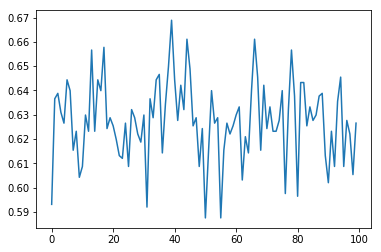

In [62]:
# Bayes classifier accuacy:
# Bayes1k = [0.8819599109131403, 0.88418708240534516, 0.88975501113585742, 0.88752783964365256, 0.89755011135857465, 0.88084632516703787, 0.86414253897550108, 0.87082405345211578, 0.87527839643652561, 0.87973273942093544, 0.89755011135857465, 0.87416481069042318, 0.87861915367483301, 0.86525612472160351, 0.88752783964365256, 0.88307349665924273, 0.87193763919821832, 0.88084632516703787, 0.89643652561247211, 0.87639198218262804, 0.85746102449888639, 0.85857461024498882, 0.89309576837416482, 0.85300668151447656, 0.87861915367483301, 0.87750556792873047, 0.87193763919821832, 0.85634743875278396, 0.86859688195991092, 0.84521158129175944, 0.88307349665924273, 0.8819599109131403, 0.86636971046770606, 0.89198218262806239, 0.88307349665924273, 0.87305122494432075, 0.86191536748329622, 0.87527839643652561, 0.87639198218262804, 0.88752783964365256, 0.86414253897550108, 0.86525612472160351, 0.88641425389755013, 0.88307349665924273, 0.8819599109131403, 0.88864142538975499, 0.86080178173719379, 0.89198218262806239, 0.8819599109131403, 0.87416481069042318, 0.87639198218262804, 0.87527839643652561, 0.8853006681514477, 0.86636971046770606, 0.88418708240534516, 0.88752783964365256, 0.86191536748329622, 0.86302895322939865, 0.87305122494432075, 0.87082405345211578, 0.85857461024498882, 0.84855233853006684, 0.85968819599109136, 0.86414253897550108, 0.8853006681514477, 0.86302895322939865, 0.87527839643652561, 0.87416481069042318, 0.88975501113585742, 0.88864142538975499, 0.85189309576837413, 0.87750556792873047, 0.87527839643652561, 0.89198218262806239, 0.87416481069042318, 0.89086859688195996, 0.87416481069042318, 0.86859688195991092, 0.87750556792873047, 0.90089086859688194, 0.87639198218262804, 0.87527839643652561, 0.87305122494432075, 0.87639198218262804, 0.86414253897550108, 0.87973273942093544, 0.85857461024498882, 0.87861915367483301, 0.86414253897550108, 0.87305122494432075, 0.88307349665924273, 0.8853006681514477, 0.87639198218262804, 0.87416481069042318, 0.85968819599109136, 0.87416481069042318, 0.86302895322939865, 0.88418708240534516, 0.8507795100222717, 0.88975501113585742, 0.8819599109131403, 0.88752783964365256, 0.89086859688195996, 0.86971046770601335, 0.87193763919821832, 0.87416481069042318, 0.87973273942093544, 0.88418708240534516, 0.87305122494432075, 0.85857461024498882, 0.86414253897550108, 0.88307349665924273, 0.86971046770601335, 0.87639198218262804, 0.85634743875278396, 0.87193763919821832, 0.83853006681514475, 0.87639198218262804, 0.87750556792873047, 0.88307349665924273, 0.87750556792873047, 0.88864142538975499, 0.85857461024498882, 0.87861915367483301, 0.85857461024498882, 0.86414253897550108, 0.87527839643652561, 0.86080178173719379, 0.86302895322939865, 0.87416481069042318, 0.87416481069042318, 0.87639198218262804, 0.87750556792873047, 0.88752783964365256, 0.87527839643652561, 0.88307349665924273, 0.87527839643652561, 0.91425389755011133, 0.86971046770601335, 0.88418708240534516, 0.86302895322939865, 0.85857461024498882, 0.87639198218262804, 0.89420935412026725, 0.87305122494432075, 0.87639198218262804, 0.85857461024498882, 0.89420935412026725, 0.87750556792873047, 0.86191536748329622, 0.87193763919821832, 0.87639198218262804, 0.87193763919821832, 0.87082405345211578, 0.86636971046770606, 0.87750556792873047, 0.87639198218262804, 0.85968819599109136, 0.8853006681514477, 0.86636971046770606, 0.88975501113585742, 0.89420935412026725, 0.86636971046770606, 0.87973273942093544, 0.8853006681514477, 0.86080178173719379, 0.87193763919821832, 0.89532293986636968, 0.8853006681514477, 0.88084632516703787, 0.86191536748329622, 0.87639198218262804, 0.87861915367483301, 0.87750556792873047, 0.8819599109131403, 0.88418708240534516, 0.86748329621380849, 0.87973273942093544, 0.86859688195991092, 0.92093541202672602, 0.86636971046770606, 0.87973273942093544, 0.87082405345211578, 0.88641425389755013, 0.86080178173719379, 0.87750556792873047, 0.86414253897550108, 0.88975501113585742, 0.86191536748329622, 0.88418708240534516, 0.88307349665924273, 0.86748329621380849, 0.86748329621380849, 0.89198218262806239, 0.89198218262806239, 0.86525612472160351, 0.87639198218262804, 0.87527839643652561, 0.86080178173719379, 0.85189309576837413, 0.89086859688195996, 0.85189309576837413, 0.87305122494432075, 0.8853006681514477, 0.9031180400890868, 0.88307349665924273, 0.86859688195991092, 0.87082405345211578, 0.87750556792873047, 0.86414253897550108, 0.87973273942093544, 0.87416481069042318, 0.87305122494432075, 0.87193763919821832, 0.88975501113585742, 0.87193763919821832, 0.89643652561247211, 0.87082405345211578, 0.86748329621380849, 0.87973273942093544, 0.86525612472160351, 0.88975501113585742, 0.87861915367483301, 0.85300668151447656, 0.87750556792873047, 0.87416481069042318, 0.87416481069042318, 0.88307349665924273, 0.86971046770601335, 0.87416481069042318, 0.87527839643652561, 0.87193763919821832, 0.87082405345211578, 0.85523385300668153, 0.86414253897550108, 0.8853006681514477, 0.87082405345211578, 0.88084632516703787, 0.8819599109131403, 0.87973273942093544, 0.85857461024498882, 0.87639198218262804, 0.87973273942093544, 0.87639198218262804, 0.88641425389755013, 0.86191536748329622, 0.8853006681514477, 0.87973273942093544, 0.89420935412026725, 0.87861915367483301, 0.87193763919821832, 0.8853006681514477, 0.89643652561247211, 0.87082405345211578, 0.86971046770601335, 0.86525612472160351, 0.88864142538975499, 0.87193763919821832, 0.86302895322939865, 0.88418708240534516, 0.87750556792873047, 0.87305122494432075, 0.88975501113585742, 0.86414253897550108, 0.85968819599109136, 0.89198218262806239, 0.87973273942093544, 0.86414253897550108, 0.88084632516703787, 0.85968819599109136, 0.84743875278396441, 0.87082405345211578, 0.86859688195991092, 0.87527839643652561, 0.86859688195991092, 0.85857461024498882, 0.88752783964365256, 0.87750556792873047, 0.8507795100222717, 0.84966592427616927, 0.89420935412026725, 0.87750556792873047, 0.89086859688195996, 0.86748329621380849, 0.88975501113585742, 0.89086859688195996, 0.87750556792873047, 0.87527839643652561, 0.86525612472160351, 0.88084632516703787, 0.88307349665924273, 0.86302895322939865, 0.88641425389755013, 0.86636971046770606, 0.86414253897550108, 0.88641425389755013, 0.88418708240534516, 0.89086859688195996, 0.86971046770601335, 0.86302895322939865, 0.88975501113585742, 0.85746102449888639, 0.87973273942093544, 0.87861915367483301, 0.87861915367483301, 0.88752783964365256, 0.86748329621380849, 0.87973273942093544, 0.87973273942093544, 0.87305122494432075, 0.87750556792873047, 0.86414253897550108, 0.87973273942093544, 0.88418708240534516, 0.85634743875278396, 0.85857461024498882, 0.8541202672605791, 0.86859688195991092, 0.87527839643652561, 0.86302895322939865, 0.87750556792873047, 0.88307349665924273, 0.86525612472160351, 0.88084632516703787, 0.87639198218262804, 0.88084632516703787, 0.88418708240534516, 0.87527839643652561, 0.87973273942093544, 0.88084632516703787, 0.89866369710467708, 0.87416481069042318, 0.87639198218262804, 0.8853006681514477, 0.90979955456570161, 0.86748329621380849, 0.88084632516703787, 0.87639198218262804, 0.87639198218262804, 0.86748329621380849, 0.89198218262806239, 0.89420935412026725, 0.86971046770601335, 0.86971046770601335, 0.87861915367483301, 0.85523385300668153, 0.86302895322939865, 0.87973273942093544, 0.86302895322939865, 0.87861915367483301, 0.87639198218262804, 0.86080178173719379, 0.85746102449888639, 0.87973273942093544, 0.88975501113585742, 0.87193763919821832, 0.88752783964365256, 0.87973273942093544, 0.87861915367483301, 0.88975501113585742, 0.86302895322939865, 0.87527839643652561, 0.89532293986636968, 0.84966592427616927, 0.88084632516703787, 0.87416481069042318, 0.88641425389755013, 0.85300668151447656, 0.87527839643652561, 0.87973273942093544, 0.86971046770601335, 0.88418708240534516, 0.86525612472160351, 0.87527839643652561, 0.87416481069042318, 0.88864142538975499, 0.89086859688195996, 0.87750556792873047, 0.87639198218262804, 0.88752783964365256, 0.86191536748329622, 0.88752783964365256, 0.86971046770601335, 0.86302895322939865, 0.88307349665924273, 0.86859688195991092, 0.88307349665924273, 0.87527839643652561, 0.87416481069042318, 0.8819599109131403, 0.88307349665924273, 0.86191536748329622, 0.87750556792873047, 0.88641425389755013, 0.88084632516703787, 0.9031180400890868, 0.86971046770601335, 0.8819599109131403, 0.85746102449888639, 0.85857461024498882, 0.89866369710467708, 0.85857461024498882, 0.88307349665924273, 0.85968819599109136, 0.8819599109131403, 0.88752783964365256, 0.88418708240534516, 0.88641425389755013, 0.87193763919821832, 0.86748329621380849, 0.87416481069042318, 0.89309576837416482, 0.86971046770601335, 0.86080178173719379, 0.86971046770601335, 0.89086859688195996, 0.86859688195991092, 0.87527839643652561, 0.86191536748329622, 0.86525612472160351, 0.88641425389755013, 0.86748329621380849, 0.87973273942093544, 0.88864142538975499, 0.89420935412026725, 0.89198218262806239, 0.88307349665924273, 0.89532293986636968, 0.88307349665924273, 0.87639198218262804, 0.86302895322939865, 0.88084632516703787, 0.86080178173719379, 0.8853006681514477, 0.87527839643652561, 0.89755011135857465, 0.85746102449888639, 0.84966592427616927, 0.87416481069042318, 0.86971046770601335, 0.86414253897550108, 0.88641425389755013, 0.86414253897550108, 0.87305122494432075, 0.87750556792873047, 0.90423162583518935, 0.87416481069042318, 0.87527839643652561, 0.87082405345211578, 0.89532293986636968, 0.88641425389755013, 0.87973273942093544, 0.85634743875278396, 0.86191536748329622, 0.9164810690423163, 0.8853006681514477, 0.87527839643652561, 0.87861915367483301, 0.84743875278396441, 0.87861915367483301, 0.86748329621380849, 0.86859688195991092, 0.86191536748329622, 0.8819599109131403, 0.86191536748329622, 0.87861915367483301, 0.86302895322939865, 0.8819599109131403, 0.87639198218262804, 0.86859688195991092, 0.87082405345211578, 0.83853006681514475, 0.86414253897550108, 0.87527839643652561, 0.87639198218262804, 0.86971046770601335, 0.86080178173719379, 0.86525612472160351, 0.87305122494432075, 0.87416481069042318, 0.87082405345211578, 0.88307349665924273, 0.87527839643652561, 0.8507795100222717, 0.87193763919821832, 0.89420935412026725, 0.87973273942093544, 0.8819599109131403, 0.86636971046770606, 0.89420935412026725, 0.88418708240534516, 0.87193763919821832, 0.87861915367483301, 0.86859688195991092, 0.88864142538975499, 0.86859688195991092, 0.8819599109131403, 0.87305122494432075, 0.87750556792873047, 0.88307349665924273, 0.88864142538975499, 0.88975501113585742, 0.87639198218262804, 0.87082405345211578, 0.87973273942093544, 0.87193763919821832, 0.87861915367483301, 0.88084632516703787, 0.86859688195991092, 0.87973273942093544, 0.88084632516703787, 0.88975501113585742, 0.88641425389755013, 0.88084632516703787, 0.87750556792873047, 0.87416481069042318, 0.87193763919821832, 0.8819599109131403, 0.87305122494432075, 0.87750556792873047, 0.87973273942093544, 0.86859688195991092, 0.87416481069042318, 0.87193763919821832, 0.85857461024498882, 0.87750556792873047, 0.87639198218262804, 0.88418708240534516, 0.85746102449888639, 0.87193763919821832, 0.87527839643652561, 0.88418708240534516, 0.86748329621380849, 0.86525612472160351, 0.88641425389755013, 0.87305122494432075, 0.88752783964365256, 0.88975501113585742, 0.85523385300668153, 0.86525612472160351, 0.88975501113585742, 0.88641425389755013, 0.85189309576837413, 0.88641425389755013, 0.86971046770601335, 0.88418708240534516, 0.87639198218262804, 0.88864142538975499, 0.87861915367483301, 0.90979955456570161, 0.88752783964365256, 0.84298440979955458, 0.88084632516703787, 0.86859688195991092, 0.86971046770601335, 0.88084632516703787, 0.87305122494432075, 0.89198218262806239, 0.86302895322939865, 0.90200445434298437, 0.87750556792873047, 0.86636971046770606, 0.87750556792873047, 0.87305122494432075, 0.89420935412026725, 0.86971046770601335, 0.87305122494432075, 0.83296213808463249, 0.87305122494432075, 0.86636971046770606, 0.87082405345211578, 0.8819599109131403, 0.89198218262806239, 0.87193763919821832, 0.86302895322939865, 0.8819599109131403, 0.8819599109131403, 0.86414253897550108, 0.86971046770601335, 0.86525612472160351, 0.87193763919821832, 0.85968819599109136, 0.87305122494432075, 0.88418708240534516, 0.87750556792873047, 0.87750556792873047, 0.87416481069042318, 0.88084632516703787, 0.86971046770601335, 0.87193763919821832, 0.88975501113585742, 0.86414253897550108, 0.87750556792873047, 0.88641425389755013, 0.88307349665924273, 0.87527839643652561, 0.89198218262806239, 0.88084632516703787, 0.84632516703786187, 0.88307349665924273, 0.87527839643652561, 0.88307349665924273, 0.8819599109131403, 0.87639198218262804, 0.86302895322939865, 0.90645879732739421, 0.88752783964365256, 0.87527839643652561, 0.88752783964365256, 0.88752783964365256, 0.88864142538975499, 0.86414253897550108, 0.87750556792873047, 0.86525612472160351, 0.89309576837416482, 0.8819599109131403, 0.87861915367483301, 0.86636971046770606, 0.9031180400890868, 0.86191536748329622, 0.88752783964365256, 0.88084632516703787, 0.87527839643652561, 0.87639198218262804, 0.87639198218262804, 0.86080178173719379, 0.87639198218262804, 0.86636971046770606, 0.88641425389755013, 0.86525612472160351, 0.89309576837416482, 0.87193763919821832, 0.89755011135857465, 0.89309576837416482, 0.87750556792873047, 0.88641425389755013, 0.88641425389755013, 0.87527839643652561, 0.87193763919821832, 0.88641425389755013, 0.86525612472160351, 0.87750556792873047, 0.86414253897550108, 0.86748329621380849, 0.8507795100222717, 0.8819599109131403, 0.87639198218262804, 0.87193763919821832, 0.85189309576837413, 0.87193763919821832, 0.86191536748329622, 0.86080178173719379, 0.87639198218262804, 0.87750556792873047, 0.87750556792873047, 0.88307349665924273, 0.8819599109131403, 0.88864142538975499, 0.89198218262806239, 0.8853006681514477, 0.85634743875278396, 0.86191536748329622, 0.87416481069042318, 0.87416481069042318, 0.87750556792873047, 0.88864142538975499, 0.88418708240534516, 0.88641425389755013, 0.85746102449888639, 0.87082405345211578, 0.87305122494432075, 0.87305122494432075, 0.87527839643652561, 0.86971046770601335, 0.87750556792873047, 0.87639198218262804, 0.89198218262806239, 0.87193763919821832, 0.86636971046770606, 0.86414253897550108, 0.88418708240534516, 0.87416481069042318, 0.86859688195991092, 0.87861915367483301, 0.88307349665924273, 0.87527839643652561, 0.87861915367483301, 0.87305122494432075, 0.89198218262806239, 0.87750556792873047, 0.86080178173719379, 0.86302895322939865, 0.87193763919821832, 0.88307349665924273, 0.88752783964365256, 0.87305122494432075, 0.87861915367483301, 0.87193763919821832, 0.88084632516703787, 0.86525612472160351, 0.87861915367483301, 0.88864142538975499, 0.86525612472160351, 0.87193763919821832, 0.86971046770601335, 0.87416481069042318, 0.89643652561247211, 0.87416481069042318, 0.86859688195991092, 0.87082405345211578, 0.85746102449888639, 0.87082405345211578, 0.86859688195991092, 0.86525612472160351, 0.87973273942093544, 0.87750556792873047, 0.86748329621380849, 0.87639198218262804, 0.86525612472160351, 0.86971046770601335, 0.86414253897550108, 0.90200445434298437, 0.86971046770601335, 0.89755011135857465, 0.87750556792873047, 0.87305122494432075, 0.88975501113585742, 0.90089086859688194, 0.87527839643652561, 0.89198218262806239, 0.86859688195991092, 0.87305122494432075, 0.86636971046770606, 0.88307349665924273, 0.88418708240534516, 0.86636971046770606, 0.87861915367483301, 0.86636971046770606, 0.87750556792873047, 0.86748329621380849, 0.85968819599109136, 0.8853006681514477, 0.88084632516703787, 0.91202672605790647, 0.87305122494432075, 0.85523385300668153, 0.8819599109131403, 0.85968819599109136, 0.87305122494432075, 0.88752783964365256, 0.87750556792873047, 0.86636971046770606, 0.88418708240534516, 0.87416481069042318, 0.85857461024498882, 0.88418708240534516, 0.8853006681514477, 0.86859688195991092, 0.86859688195991092, 0.87193763919821832, 0.86636971046770606, 0.86859688195991092, 0.86859688195991092, 0.88084632516703787, 0.88084632516703787, 0.87305122494432075, 0.87416481069042318, 0.87973273942093544, 0.86748329621380849, 0.87193763919821832, 0.90089086859688194, 0.89309576837416482, 0.88084632516703787, 0.86525612472160351, 0.87416481069042318, 0.87973273942093544, 0.88864142538975499, 0.89643652561247211, 0.88752783964365256, 0.85634743875278396, 0.86080178173719379, 0.8819599109131403, 0.86191536748329622, 0.87416481069042318, 0.87861915367483301, 0.85857461024498882, 0.87082405345211578, 0.90200445434298437, 0.87193763919821832, 0.86414253897550108, 0.88752783964365256, 0.8819599109131403, 0.87305122494432075, 0.85746102449888639, 0.91202672605790647, 0.87861915367483301, 0.89532293986636968, 0.86414253897550108, 0.88307349665924273, 0.87861915367483301, 0.85300668151447656, 0.88084632516703787, 0.87527839643652561, 0.87861915367483301, 0.87416481069042318, 0.87973273942093544, 0.83407572383073492, 0.87639198218262804, 0.8853006681514477, 0.87973273942093544, 0.86525612472160351, 0.87861915367483301, 0.88752783964365256, 0.85634743875278396, 0.88418708240534516, 0.88307349665924273, 0.87305122494432075, 0.88864142538975499, 0.86636971046770606, 0.89532293986636968, 0.86525612472160351, 0.85857461024498882, 0.87305122494432075, 0.87416481069042318, 0.90423162583518935, 0.86859688195991092, 0.88752783964365256, 0.8819599109131403, 0.86525612472160351, 0.86748329621380849, 0.87861915367483301, 0.88975501113585742, 0.86971046770601335, 0.86302895322939865, 0.89755011135857465, 0.90979955456570161, 0.88307349665924273, 0.85857461024498882, 0.86971046770601335, 0.86748329621380849, 0.88084632516703787, 0.88752783964365256, 0.86636971046770606, 0.88864142538975499, 0.86080178173719379, 0.87639198218262804, 0.87973273942093544, 0.88752783964365256, 0.88307349665924273, 0.87082405345211578, 0.89309576837416482, 0.87639198218262804, 0.88752783964365256, 0.86414253897550108, 0.86080178173719379, 0.8541202672605791, 0.87082405345211578, 0.8819599109131403, 0.8819599109131403, 0.87416481069042318, 0.87750556792873047, 0.87082405345211578, 0.8853006681514477, 0.88307349665924273, 0.85523385300668153, 0.73719376391982183, 0.86302895322939865, 0.87973273942093544, 0.89420935412026725, 0.87861915367483301, 0.87193763919821832, 0.88307349665924273, 0.87305122494432075, 0.88641425389755013, 0.88975501113585742, 0.89755011135857465, 0.85523385300668153, 0.86859688195991092, 0.89420935412026725, 0.87861915367483301, 0.89420935412026725, 0.88752783964365256, 0.87416481069042318, 0.88084632516703787, 0.86859688195991092, 0.88084632516703787, 0.87973273942093544, 0.89198218262806239, 0.87639198218262804, 0.86748329621380849, 0.86748329621380849, 0.85968819599109136, 0.8853006681514477, 0.88084632516703787, 0.8853006681514477, 0.88975501113585742, 0.86859688195991092, 0.88084632516703787, 0.87416481069042318, 0.87305122494432075, 0.87750556792873047, 0.88752783964365256, 0.86414253897550108, 0.87973273942093544, 0.87639198218262804, 0.88084632516703787, 0.85634743875278396, 0.87750556792873047, 0.87193763919821832, 0.86859688195991092, 0.88975501113585742, 0.8819599109131403, 0.87750556792873047, 0.85968819599109136, 0.87639198218262804, 0.88418708240534516, 0.88641425389755013, 0.87639198218262804, 0.87639198218262804, 0.86748329621380849, 0.89086859688195996, 0.88975501113585742, 0.86080178173719379, 0.87305122494432075, 0.86859688195991092, 0.87639198218262804, 0.88975501113585742, 0.87193763919821832, 0.87639198218262804, 0.87527839643652561, 0.87527839643652561, 0.86748329621380849, 0.86525612472160351, 0.88975501113585742, 0.86636971046770606, 0.87750556792873047, 0.88084632516703787, 0.88418708240534516, 0.87750556792873047, 0.88084632516703787, 0.87639198218262804, 0.86525612472160351, 0.89309576837416482, 0.89755011135857465, 0.87527839643652561, 0.84075723830734972, 0.8541202672605791, 0.86748329621380849, 0.86414253897550108, 0.88418708240534516, 0.85968819599109136, 0.87193763919821832, 0.89086859688195996, 0.88864142538975499, 0.8819599109131403, 0.87193763919821832, 0.87527839643652561, 0.86636971046770606, 0.88752783964365256, 0.87416481069042318, 0.87861915367483301, 0.87193763919821832, 0.88084632516703787, 0.87416481069042318, 0.86080178173719379, 0.8819599109131403, 0.86191536748329622, 0.86302895322939865, 0.87973273942093544, 0.87973273942093544, 0.87527839643652561, 0.8853006681514477, 0.8853006681514477, 0.89420935412026725, 0.89198218262806239, 0.85857461024498882, 0.86636971046770606, 0.8853006681514477, 0.87639198218262804, 0.89198218262806239, 0.87639198218262804, 0.8853006681514477, 0.87416481069042318, 0.86525612472160351, 0.8819599109131403, 0.87193763919821832, 0.88864142538975499, 0.87973273942093544, 0.86191536748329622, 0.88752783964365256, 0.88752783964365256, 0.86191536748329622, 0.86748329621380849, 0.86636971046770606, 0.88641425389755013, 0.86971046770601335, 0.88084632516703787, 0.88307349665924273, 0.87973273942093544, 0.87973273942093544, 0.87973273942093544, 0.87082405345211578, 0.85746102449888639, 0.87305122494432075, 0.88864142538975499, 0.86971046770601335, 0.87750556792873047, 0.85523385300668153, 0.86748329621380849, 0.87193763919821832, 0.8853006681514477, 0.86191536748329622, 0.87750556792873047, 0.87861915367483301, 0.86859688195991092, 0.88864142538975499, 0.89866369710467708, 0.86971046770601335, 0.86748329621380849, 0.86859688195991092, 0.87416481069042318, 0.89309576837416482, 0.8853006681514477, 0.87639198218262804, 0.87639198218262804, 0.87639198218262804, 0.88418708240534516, 0.87082405345211578, 0.87861915367483301, 0.85189309576837413, 0.8819599109131403, 0.88418708240534516, 0.89086859688195996, 0.87416481069042318, 0.86748329621380849, 0.88307349665924273, 0.85857461024498882, 0.88307349665924273, 0.89198218262806239, 0.87973273942093544, 0.87750556792873047, 0.88864142538975499, 0.86191536748329622, 0.88418708240534516, 0.87750556792873047, 0.87639198218262804, 0.86636971046770606, 0.8541202672605791, 0.86859688195991092, 0.87082405345211578, 0.87193763919821832, 0.88418708240534516, 0.87861915367483301, 0.88864142538975499, 0.86080178173719379, 0.87861915367483301, 0.8819599109131403, 0.87082405345211578, 0.8819599109131403, 0.86525612472160351, 0.83073496659242763, 0.87973273942093544, 0.88418708240534516, 0.87305122494432075, 0.86302895322939865, 0.88418708240534516, 0.87750556792873047, 0.88752783964365256, 0.86302895322939865, 0.88752783964365256, 0.86748329621380849, 0.8507795100222717, 0.87193763919821832, 0.90089086859688194, 0.89420935412026725, 0.87082405345211578, 0.87973273942093544, 0.86525612472160351, 0.88641425389755013, 0.87082405345211578, 0.88864142538975499, 0.88307349665924273, 0.89755011135857465, 0.85523385300668153, 0.86302895322939865, 0.89532293986636968, 0.88084632516703787, 0.87639198218262804, 0.89198218262806239, 0.87973273942093544, 0.86525612472160351, 0.86525612472160351, 0.89086859688195996, 0.87861915367483301, 0.89755011135857465, 0.87527839643652561, 0.88307349665924273, 0.88752783964365256, 0.87193763919821832, 0.86191536748329622]
# plot(Bayes1k)
plot(result)

In [63]:
y_pre = clf.predict(x)  # 讓 AI 看新的資料，產生新的 tags
%f __main__ :> y_pre py> sum(pop()) . cr
%f __main__ :> y     py> sum(pop()) . cr
%f __main__ :> y_pre[:20] . cr
%f __main__ :> y[:20] . cr
%f __main__ :> y_pre[20] . cr
%f __main__ :> y[20] . cr
    

703.0
1571.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
0.0


In [64]:
# 查看 AI 預測的結果，與人工 tag 比較。
categories = [0,0,0,0]
for i in range(y.shape[0]): 
    if int(y_pre[i])==int(y[i]) and int(y[i])==0: categories[0]+=1; continue
    if int(y_pre[i])!=int(y[i]) and int(y[i])==1: categories[1]+=1; continue
    if int(y_pre[i])!=int(y[i]) and int(y[i])==0: categories[2]+=1; continue
    if int(y_pre[i])==int(y[i]) and int(y[i])==1: categories[3]+=1; continue
%f __main__ :> categories ( 沒事的，漏掉的，多的，一致的 ) tib.

__main__ :> categories ( 沒事的，漏掉的，多的，一致的 ) tib. \ ==> [2510, 1270, 402, 301] (<class 'list'>)


### 用 KNN 跑 1000 次來看，從頭到尾都是隨機的。

In [ ]:
# KNN classifier accuacy:
KNN1k = [0.495114006514658, 0.5146579804560261, 0.499457111834962, 0.4799131378935939, 0.46796959826275786, 0.494028230184582, 0.504885993485342, 0.496199782844734, 0.4831704668838219, 0.498371335504886, 0.501628664495114, 0.498371335504886, 0.4799131378935939, 0.509229098805646, 0.512486427795874, 0.48534201954397393, 0.500542888165038, 0.496199782844734, 0.48968512486427795, 0.49077090119435396, 0.4831704668838219, 0.4733984799131379, 0.48642779587404994, 0.503800217155266, 0.46145494028230183, 0.4831704668838219, 0.494028230184582, 0.48642779587404994, 0.4723127035830619, 0.48425624321389793, 0.49077090119435396, 0.4820846905537459, 0.509229098805646, 0.48751357220412594, 0.49185667752442996, 0.48968512486427795, 0.504885993485342, 0.5266015200868621, 0.498371335504886, 0.48425624321389793, 0.49077090119435396, 0.498371335504886, 0.496199782844734, 0.499457111834962, 0.4723127035830619, 0.49185667752442996, 0.49185667752442996, 0.50271444082519, 0.50814332247557, 0.495114006514658, 0.49185667752442996, 0.48534201954397393, 0.494028230184582, 0.46362649294245384, 0.5276872964169381, 0.5298588490770901, 0.50271444082519, 0.48751357220412594, 0.500542888165038, 0.501628664495114, 0.4755700325732899, 0.49728555917481, 0.501628664495114, 0.4538545059717698, 0.507057546145494, 0.48534201954397393, 0.4723127035830619, 0.496199782844734, 0.4788273615635179, 0.498371335504886, 0.49728555917481, 0.49185667752442996, 0.5320304017372421, 0.46905537459283386, 0.48425624321389793, 0.4538545059717698, 0.49728555917481, 0.499457111834962, 0.48751357220412594, 0.46579804560260585, 0.4733984799131379, 0.499457111834962, 0.511400651465798, 0.496199782844734, 0.4820846905537459, 0.46688382193268185, 0.48534201954397393, 0.49294245385450597, 0.496199782844734, 0.5135722041259501, 0.46471226927252984, 0.499457111834962, 0.496199782844734, 0.503800217155266, 0.4744842562432139, 0.48751357220412594, 0.5190010857763301, 0.48968512486427795, 0.496199782844734, 0.4755700325732899, 0.48859934853420195, 0.496199782844734, 0.4788273615635179, 0.49185667752442996, 0.505971769815418, 0.495114006514658, 0.50814332247557, 0.46579804560260585, 0.48534201954397393, 0.48859934853420195, 0.4744842562432139, 0.46796959826275786, 0.49185667752442996, 0.4831704668838219, 0.50271444082519, 0.5157437567861021, 0.48968512486427795, 0.4766558089033659, 0.4788273615635179, 0.4799131378935939, 0.49077090119435396, 0.46796959826275786, 0.501628664495114, 0.4809989142236699, 0.48968512486427795, 0.46579804560260585, 0.503800217155266, 0.4744842562432139, 0.48968512486427795, 0.4820846905537459, 0.511400651465798, 0.47122692725298587, 0.47122692725298587, 0.509229098805646, 0.4809989142236699, 0.501628664495114, 0.509229098805646, 0.49077090119435396, 0.46471226927252984, 0.498371335504886, 0.507057546145494, 0.46579804560260585, 0.5374592833876222, 0.503800217155266, 0.46145494028230183, 0.498371335504886, 0.4777415852334419, 0.4788273615635179, 0.505971769815418, 0.503800217155266, 0.48968512486427795, 0.48425624321389793, 0.48642779587404994, 0.50814332247557, 0.48751357220412594, 0.48859934853420195, 0.4733984799131379, 0.496199782844734, 0.512486427795874, 0.48968512486427795, 0.4744842562432139, 0.4766558089033659, 0.46796959826275786, 0.4820846905537459, 0.4820846905537459, 0.509229098805646, 0.49077090119435396, 0.4744842562432139, 0.503800217155266, 0.49294245385450597, 0.5168295331161781, 0.4755700325732899, 0.495114006514658, 0.505971769815418, 0.4831704668838219, 0.48642779587404994, 0.498371335504886, 0.49728555917481, 0.49294245385450597, 0.48534201954397393, 0.500542888165038, 0.49185667752442996, 0.48425624321389793, 0.49728555917481, 0.509229098805646, 0.48859934853420195, 0.48642779587404994, 0.49185667752442996, 0.46905537459283386, 0.499457111834962, 0.48642779587404994, 0.4723127035830619, 0.501628664495114, 0.48534201954397393, 0.4755700325732899, 0.4777415852334419, 0.48968512486427795, 0.5190010857763301, 0.4809989142236699, 0.494028230184582, 0.4809989142236699, 0.510314875135722, 0.44625407166123776, 0.495114006514658, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.505971769815418, 0.5157437567861021, 0.507057546145494, 0.5211726384364821, 0.498371335504886, 0.4788273615635179, 0.5222584147665581, 0.5244299674267101, 0.50271444082519, 0.4809989142236699, 0.47014115092290987, 0.4788273615635179, 0.509229098805646, 0.4809989142236699, 0.4766558089033659, 0.48751357220412594, 0.48425624321389793, 0.48968512486427795, 0.4723127035830619, 0.49294245385450597, 0.5146579804560261, 0.46145494028230183, 0.49185667752442996, 0.4581976112920738, 0.48534201954397393, 0.500542888165038, 0.498371335504886, 0.48425624321389793, 0.498371335504886, 0.505971769815418, 0.499457111834962, 0.495114006514658, 0.49077090119435396, 0.4820846905537459, 0.4766558089033659, 0.4820846905537459, 0.494028230184582, 0.4809989142236699, 0.496199782844734, 0.495114006514658, 0.4766558089033659, 0.48859934853420195, 0.510314875135722, 0.4809989142236699, 0.50814332247557, 0.509229098805646, 0.47014115092290987, 0.49294245385450597, 0.46579804560260585, 0.48534201954397393, 0.48534201954397393, 0.47122692725298587, 0.48751357220412594, 0.499457111834962, 0.4777415852334419, 0.494028230184582, 0.4766558089033659, 0.501628664495114, 0.48751357220412594, 0.4831704668838219, 0.48425624321389793, 0.494028230184582, 0.49077090119435396, 0.48534201954397393, 0.510314875135722, 0.4799131378935939, 0.4766558089033659, 0.49294245385450597, 0.46796959826275786, 0.49185667752442996, 0.4755700325732899, 0.48968512486427795, 0.5135722041259501, 0.4766558089033659, 0.4788273615635179, 0.4788273615635179, 0.4820846905537459, 0.49728555917481, 0.496199782844734, 0.4755700325732899, 0.5222584147665581, 0.48751357220412594, 0.4777415852334419, 0.49185667752442996, 0.5179153094462541, 0.501628664495114, 0.46688382193268185, 0.50814332247557, 0.4820846905537459, 0.49185667752442996, 0.49294245385450597, 0.501628664495114, 0.48534201954397393, 0.4788273615635179, 0.495114006514658, 0.50271444082519, 0.50814332247557, 0.49077090119435396, 0.46471226927252984, 0.48534201954397393, 0.4799131378935939, 0.48751357220412594, 0.4744842562432139, 0.4549402823018458, 0.494028230184582, 0.49728555917481, 0.49185667752442996, 0.501628664495114, 0.49294245385450597, 0.4755700325732899, 0.50814332247557, 0.48642779587404994, 0.4831704668838219, 0.49185667752442996, 0.500542888165038, 0.50271444082519, 0.495114006514658, 0.509229098805646, 0.507057546145494, 0.501628664495114, 0.48534201954397393, 0.499457111834962, 0.48751357220412594, 0.494028230184582, 0.49077090119435396, 0.496199782844734, 0.496199782844734, 0.4820846905537459, 0.500542888165038, 0.512486427795874, 0.4820846905537459, 0.509229098805646, 0.495114006514658, 0.501628664495114, 0.50814332247557, 0.512486427795874, 0.4723127035830619, 0.496199782844734, 0.48534201954397393, 0.48534201954397393, 0.4820846905537459, 0.49728555917481, 0.5190010857763301, 0.48534201954397393, 0.48642779587404994, 0.494028230184582, 0.47122692725298587, 0.49728555917481, 0.4777415852334419, 0.494028230184582, 0.494028230184582, 0.4820846905537459, 0.5135722041259501, 0.504885993485342, 0.48859934853420195, 0.496199782844734, 0.50271444082519, 0.49294245385450597, 0.4820846905537459, 0.49728555917481, 0.507057546145494, 0.498371335504886, 0.49728555917481, 0.5146579804560261, 0.48968512486427795, 0.46905537459283386, 0.5255157437567861, 0.498371335504886, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.5135722041259501, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.49294245385450597, 0.505971769815418, 0.4799131378935939, 0.5211726384364821, 0.48859934853420195, 0.46579804560260585, 0.494028230184582, 0.49294245385450597, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.48751357220412594, 0.496199782844734, 0.50814332247557, 0.499457111834962, 0.512486427795874, 0.49185667752442996, 0.504885993485342, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.4755700325732899, 0.4820846905537459, 0.5135722041259501, 0.510314875135722, 0.495114006514658, 0.4723127035830619, 0.4733984799131379, 0.5168295331161781, 0.49077090119435396, 0.4799131378935939, 0.5146579804560261, 0.4755700325732899, 0.4799131378935939, 0.4766558089033659, 0.5255157437567861, 0.4820846905537459, 0.512486427795874, 0.50271444082519, 0.501628664495114, 0.503800217155266, 0.494028230184582, 0.500542888165038, 0.48751357220412594, 0.495114006514658, 0.496199782844734, 0.48751357220412594, 0.511400651465798, 0.48968512486427795, 0.498371335504886, 0.49728555917481, 0.50814332247557, 0.46362649294245384, 0.48968512486427795, 0.510314875135722, 0.501628664495114, 0.46796959826275786, 0.46362649294245384, 0.48859934853420195, 0.501628664495114, 0.4831704668838219, 0.49185667752442996, 0.49294245385450597, 0.4831704668838219, 0.494028230184582, 0.505971769815418, 0.4592833876221498, 0.5146579804560261, 0.46905537459283386, 0.49077090119435396, 0.49077090119435396, 0.494028230184582, 0.48859934853420195, 0.501628664495114, 0.4799131378935939, 0.49728555917481, 0.48968512486427795, 0.504885993485342, 0.498371335504886, 0.499457111834962, 0.49728555917481, 0.503800217155266, 0.5190010857763301, 0.496199782844734, 0.512486427795874, 0.46362649294245384, 0.48968512486427795, 0.48751357220412594, 0.4831704668838219, 0.4592833876221498, 0.498371335504886, 0.46579804560260585, 0.4603691639522258, 0.494028230184582, 0.4603691639522258, 0.48751357220412594, 0.5179153094462541, 0.4820846905537459, 0.495114006514658, 0.4766558089033659, 0.4788273615635179, 0.4766558089033659, 0.48642779587404994, 0.48425624321389793, 0.499457111834962, 0.495114006514658, 0.503800217155266, 0.505971769815418, 0.4809989142236699, 0.49185667752442996, 0.4831704668838219, 0.5135722041259501, 0.496199782844734, 0.48968512486427795, 0.48425624321389793, 0.4744842562432139, 0.509229098805646, 0.5179153094462541, 0.50814332247557, 0.49294245385450597, 0.4733984799131379, 0.509229098805646, 0.48642779587404994, 0.47122692725298587, 0.4766558089033659, 0.49077090119435396, 0.500542888165038, 0.49728555917481, 0.49077090119435396, 0.46579804560260585, 0.498371335504886, 0.495114006514658, 0.49294245385450597, 0.47014115092290987, 0.4375678610206297, 0.505971769815418, 0.499457111834962, 0.44516829533116176, 0.46145494028230183, 0.4755700325732899, 0.5342019543973942, 0.501628664495114, 0.4755700325732899, 0.46254071661237783, 0.503800217155266, 0.4820846905537459, 0.498371335504886, 0.5200868621064061, 0.496199782844734, 0.48968512486427795, 0.501628664495114, 0.48534201954397393, 0.4744842562432139, 0.4799131378935939, 0.4777415852334419, 0.501628664495114, 0.496199782844734, 0.4820846905537459, 0.47014115092290987, 0.501628664495114, 0.48534201954397393, 0.511400651465798, 0.4820846905537459, 0.4733984799131379, 0.50271444082519, 0.4820846905537459, 0.511400651465798, 0.4799131378935939, 0.48859934853420195, 0.499457111834962, 0.4831704668838219, 0.4755700325732899, 0.504885993485342, 0.509229098805646, 0.49077090119435396, 0.5255157437567861, 0.4831704668838219, 0.4820846905537459, 0.48751357220412594, 0.47014115092290987, 0.48425624321389793, 0.46362649294245384, 0.4799131378935939, 0.5146579804560261, 0.4831704668838219, 0.4755700325732899, 0.49728555917481, 0.4820846905537459, 0.48859934853420195, 0.49185667752442996, 0.49294245385450597, 0.49185667752442996, 0.4831704668838219, 0.501628664495114, 0.500542888165038, 0.5135722041259501, 0.4733984799131379, 0.5200868621064061, 0.50271444082519, 0.500542888165038, 0.4723127035830619, 0.49728555917481, 0.505971769815418, 0.501628664495114, 0.494028230184582, 0.499457111834962, 0.4809989142236699, 0.46905537459283386, 0.509229098805646, 0.5157437567861021, 0.503800217155266, 0.50271444082519, 0.507057546145494, 0.4777415852334419, 0.49077090119435396, 0.48534201954397393, 0.49728555917481, 0.4592833876221498, 0.509229098805646, 0.510314875135722, 0.4755700325732899, 0.49077090119435396, 0.498371335504886, 0.4831704668838219, 0.5222584147665581, 0.49185667752442996, 0.48751357220412594, 0.48425624321389793, 0.47122692725298587, 0.499457111834962, 0.48968512486427795, 0.48968512486427795, 0.4766558089033659, 0.48968512486427795, 0.5135722041259501, 0.46254071661237783, 0.49294245385450597, 0.4744842562432139, 0.4788273615635179, 0.5255157437567861, 0.50814332247557, 0.494028230184582, 0.4788273615635179, 0.4788273615635179, 0.49077090119435396, 0.48859934853420195, 0.4809989142236699, 0.49077090119435396, 0.48534201954397393, 0.48751357220412594, 0.49185667752442996, 0.494028230184582, 0.4788273615635179, 0.46905537459283386, 0.48642779587404994, 0.49728555917481, 0.509229098805646, 0.48425624321389793, 0.4831704668838219, 0.49185667752442996, 0.49077090119435396, 0.47014115092290987, 0.501628664495114, 0.50814332247557, 0.48859934853420195, 0.495114006514658, 0.49294245385450597, 0.5168295331161781, 0.49294245385450597, 0.49294245385450597, 0.48859934853420195, 0.505971769815418, 0.48642779587404994, 0.507057546145494, 0.501628664495114, 0.49185667752442996, 0.48534201954397393, 0.50814332247557, 0.501628664495114, 0.504885993485342, 0.4788273615635179, 0.4799131378935939, 0.500542888165038, 0.4723127035830619, 0.49077090119435396, 0.5190010857763301, 0.48968512486427795, 0.46905537459283386, 0.5135722041259501, 0.4820846905537459, 0.5179153094462541, 0.4538545059717698, 0.47014115092290987, 0.494028230184582, 0.509229098805646, 0.500542888165038, 0.500542888165038, 0.495114006514658, 0.504885993485342, 0.48534201954397393, 0.48968512486427795, 0.4788273615635179, 0.505971769815418, 0.4820846905537459, 0.46579804560260585, 0.4723127035830619, 0.4744842562432139, 0.48642779587404994, 0.507057546145494, 0.4777415852334419, 0.47122692725298587, 0.49728555917481, 0.5211726384364821, 0.46471226927252984, 0.496199782844734, 0.48968512486427795, 0.46688382193268185, 0.48751357220412594, 0.46688382193268185, 0.46796959826275786, 0.48968512486427795, 0.501628664495114, 0.496199782844734, 0.498371335504886, 0.48968512486427795, 0.48968512486427795, 0.505971769815418, 0.504885993485342, 0.48534201954397393, 0.509229098805646, 0.494028230184582, 0.4799131378935939, 0.499457111834962, 0.48751357220412594, 0.49077090119435396, 0.49294245385450597, 0.4766558089033659, 0.48751357220412594, 0.49185667752442996, 0.48425624321389793, 0.500542888165038, 0.501628664495114, 0.500542888165038, 0.5287730727470141, 0.4777415852334419, 0.5168295331161781, 0.50814332247557, 0.48642779587404994, 0.46796959826275786, 0.4723127035830619, 0.4766558089033659, 0.494028230184582, 0.4755700325732899, 0.5157437567861021, 0.512486427795874, 0.4820846905537459, 0.44516829533116176, 0.495114006514658, 0.48751357220412594, 0.48642779587404994, 0.509229098805646, 0.49294245385450597, 0.48425624321389793, 0.504885993485342, 0.4809989142236699, 0.48859934853420195, 0.47122692725298587, 0.48968512486427795, 0.4799131378935939, 0.48751357220412594, 0.48425624321389793, 0.4820846905537459, 0.500542888165038, 0.501628664495114, 0.4799131378935939, 0.495114006514658, 0.5222584147665581, 0.50271444082519, 0.48751357220412594, 0.501628664495114, 0.4788273615635179, 0.48425624321389793, 0.49728555917481, 0.46688382193268185, 0.4592833876221498, 0.46471226927252984, 0.4733984799131379, 0.4788273615635179, 0.49185667752442996, 0.494028230184582, 0.48425624321389793, 0.47122692725298587, 0.507057546145494, 0.494028230184582, 0.48968512486427795, 0.48425624321389793, 0.4820846905537459, 0.499457111834962, 0.48859934853420195, 0.505971769815418, 0.48425624321389793, 0.48534201954397393, 0.495114006514658, 0.494028230184582, 0.46471226927252984, 0.4820846905537459, 0.48642779587404994, 0.495114006514658, 0.49077090119435396, 0.46796959826275786, 0.4560260586319218, 0.495114006514658, 0.4809989142236699, 0.495114006514658, 0.4831704668838219, 0.500542888165038, 0.4592833876221498, 0.48968512486427795, 0.48642779587404994, 0.4755700325732899, 0.511400651465798, 0.48534201954397393, 0.50271444082519, 0.48642779587404994, 0.46362649294245384, 0.4733984799131379, 0.4831704668838219, 0.4831704668838219, 0.495114006514658, 0.44516829533116176, 0.48425624321389793, 0.49294245385450597, 0.46579804560260585, 0.495114006514658, 0.4766558089033659, 0.496199782844734, 0.498371335504886, 0.4809989142236699, 0.495114006514658, 0.50814332247557, 0.4820846905537459, 0.495114006514658, 0.512486427795874, 0.4820846905537459, 0.4549402823018458, 0.4723127035830619, 0.49294245385450597, 0.510314875135722, 0.4755700325732899, 0.4820846905537459, 0.4723127035830619, 0.48859934853420195, 0.48642779587404994, 0.4592833876221498, 0.5135722041259501, 0.48534201954397393, 0.4788273615635179, 0.4820846905537459, 0.47014115092290987, 0.512486427795874, 0.501628664495114, 0.5287730727470141, 0.499457111834962, 0.509229098805646, 0.4820846905537459, 0.48751357220412594, 0.48751357220412594, 0.48968512486427795, 0.5211726384364821, 0.4799131378935939, 0.511400651465798, 0.494028230184582, 0.499457111834962, 0.509229098805646, 0.504885993485342, 0.4592833876221498, 0.4755700325732899, 0.47014115092290987, 0.49294245385450597, 0.496199782844734, 0.4799131378935939, 0.50271444082519, 0.48425624321389793, 0.49294245385450597, 0.46471226927252984, 0.500542888165038, 0.499457111834962, 0.500542888165038, 0.48751357220412594, 0.48751357220412594, 0.4799131378935939, 0.49185667752442996, 0.49185667752442996, 0.4777415852334419, 0.5179153094462541, 0.4788273615635179, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.496199782844734, 0.496199782844734, 0.501628664495114, 0.48425624321389793, 0.48534201954397393, 0.5190010857763301, 0.496199782844734, 0.5179153094462541, 0.48859934853420195, 0.501628664495114, 0.46579804560260585, 0.46471226927252984, 0.49294245385450597, 0.500542888165038, 0.504885993485342, 0.4755700325732899, 0.4831704668838219, 0.495114006514658, 0.49077090119435396, 0.48751357220412594, 0.49728555917481, 0.48859934853420195, 0.496199782844734, 0.48968512486427795, 0.48968512486427795, 0.49728555917481, 0.4755700325732899, 0.44733984799131377, 0.4766558089033659, 0.49185667752442996, 0.48425624321389793, 0.48751357220412594, 0.48751357220412594, 0.4809989142236699, 0.4831704668838219, 0.49728555917481, 0.46579804560260585, 0.46688382193268185, 0.4831704668838219, 0.5222584147665581, 0.494028230184582, 0.495114006514658, 0.4799131378935939, 0.500542888165038, 0.4766558089033659, 0.50271444082519, 0.494028230184582, 0.4799131378935939, 0.50271444082519, 0.494028230184582, 0.4777415852334419, 0.48425624321389793, 0.503800217155266, 0.498371335504886, 0.49077090119435396, 0.511400651465798, 0.496199782844734, 0.4603691639522258, 0.48425624321389793, 0.4799131378935939, 0.496199782844734, 0.50814332247557, 0.4831704668838219, 0.49077090119435396, 0.48425624321389793, 0.48425624321389793, 0.4733984799131379, 0.48534201954397393, 0.49185667752442996, 0.50271444082519, 0.48751357220412594, 0.48642779587404994, 0.44733984799131377, 0.48859934853420195, 0.48642779587404994, 0.48642779587404994, 0.4603691639522258, 0.49185667752442996, 0.48534201954397393, 0.48859934853420195, 0.48751357220412594, 0.496199782844734, 0.512486427795874, 0.48425624321389793, 0.4820846905537459, 0.49185667752442996, 0.4744842562432139, 0.50271444082519, 0.4744842562432139, 0.4809989142236699, 0.48968512486427795, 0.498371335504886, 0.47122692725298587, 0.48751357220412594, 0.49077090119435396, 0.48642779587404994, 0.4723127035830619, 0.5211726384364821, 0.500542888165038, 0.5179153094462541, 0.48425624321389793, 0.49185667752442996, 0.49077090119435396, 0.48534201954397393, 0.498371335504886, 0.48534201954397393, 0.509229098805646, 0.4723127035830619, 0.4755700325732899, 0.501628664495114, 0.48534201954397393, 0.50271444082519, 0.5331161780673181, 0.46688382193268185, 0.4744842562432139, 0.504885993485342, 0.4766558089033659, 0.5222584147665581, 0.4820846905537459]
plt.plot(KNN1k)

In [ ]:
# KNN classifier accuacy:
KNN1k = [0.495114006514658, 0.5146579804560261, 0.499457111834962, 0.4799131378935939, 0.46796959826275786, 0.494028230184582, 0.504885993485342, 0.496199782844734, 0.4831704668838219, 0.498371335504886, 0.501628664495114, 0.498371335504886, 0.4799131378935939, 0.509229098805646, 0.512486427795874, 0.48534201954397393, 0.500542888165038, 0.496199782844734, 0.48968512486427795, 0.49077090119435396, 0.4831704668838219, 0.4733984799131379, 0.48642779587404994, 0.503800217155266, 0.46145494028230183, 0.4831704668838219, 0.494028230184582, 0.48642779587404994, 0.4723127035830619, 0.48425624321389793, 0.49077090119435396, 0.4820846905537459, 0.509229098805646, 0.48751357220412594, 0.49185667752442996, 0.48968512486427795, 0.504885993485342, 0.5266015200868621, 0.498371335504886, 0.48425624321389793, 0.49077090119435396, 0.498371335504886, 0.496199782844734, 0.499457111834962, 0.4723127035830619, 0.49185667752442996, 0.49185667752442996, 0.50271444082519, 0.50814332247557, 0.495114006514658, 0.49185667752442996, 0.48534201954397393, 0.494028230184582, 0.46362649294245384, 0.5276872964169381, 0.5298588490770901, 0.50271444082519, 0.48751357220412594, 0.500542888165038, 0.501628664495114, 0.4755700325732899, 0.49728555917481, 0.501628664495114, 0.4538545059717698, 0.507057546145494, 0.48534201954397393, 0.4723127035830619, 0.496199782844734, 0.4788273615635179, 0.498371335504886, 0.49728555917481, 0.49185667752442996, 0.5320304017372421, 0.46905537459283386, 0.48425624321389793, 0.4538545059717698, 0.49728555917481, 0.499457111834962, 0.48751357220412594, 0.46579804560260585, 0.4733984799131379, 0.499457111834962, 0.511400651465798, 0.496199782844734, 0.4820846905537459, 0.46688382193268185, 0.48534201954397393, 0.49294245385450597, 0.496199782844734, 0.5135722041259501, 0.46471226927252984, 0.499457111834962, 0.496199782844734, 0.503800217155266, 0.4744842562432139, 0.48751357220412594, 0.5190010857763301, 0.48968512486427795, 0.496199782844734, 0.4755700325732899, 0.48859934853420195, 0.496199782844734, 0.4788273615635179, 0.49185667752442996, 0.505971769815418, 0.495114006514658, 0.50814332247557, 0.46579804560260585, 0.48534201954397393, 0.48859934853420195, 0.4744842562432139, 0.46796959826275786, 0.49185667752442996, 0.4831704668838219, 0.50271444082519, 0.5157437567861021, 0.48968512486427795, 0.4766558089033659, 0.4788273615635179, 0.4799131378935939, 0.49077090119435396, 0.46796959826275786, 0.501628664495114, 0.4809989142236699, 0.48968512486427795, 0.46579804560260585, 0.503800217155266, 0.4744842562432139, 0.48968512486427795, 0.4820846905537459, 0.511400651465798, 0.47122692725298587, 0.47122692725298587, 0.509229098805646, 0.4809989142236699, 0.501628664495114, 0.509229098805646, 0.49077090119435396, 0.46471226927252984, 0.498371335504886, 0.507057546145494, 0.46579804560260585, 0.5374592833876222, 0.503800217155266, 0.46145494028230183, 0.498371335504886, 0.4777415852334419, 0.4788273615635179, 0.505971769815418, 0.503800217155266, 0.48968512486427795, 0.48425624321389793, 0.48642779587404994, 0.50814332247557, 0.48751357220412594, 0.48859934853420195, 0.4733984799131379, 0.496199782844734, 0.512486427795874, 0.48968512486427795, 0.4744842562432139, 0.4766558089033659, 0.46796959826275786, 0.4820846905537459, 0.4820846905537459, 0.509229098805646, 0.49077090119435396, 0.4744842562432139, 0.503800217155266, 0.49294245385450597, 0.5168295331161781, 0.4755700325732899, 0.495114006514658, 0.505971769815418, 0.4831704668838219, 0.48642779587404994, 0.498371335504886, 0.49728555917481, 0.49294245385450597, 0.48534201954397393, 0.500542888165038, 0.49185667752442996, 0.48425624321389793, 0.49728555917481, 0.509229098805646, 0.48859934853420195, 0.48642779587404994, 0.49185667752442996, 0.46905537459283386, 0.499457111834962, 0.48642779587404994, 0.4723127035830619, 0.501628664495114, 0.48534201954397393, 0.4755700325732899, 0.4777415852334419, 0.48968512486427795, 0.5190010857763301, 0.4809989142236699, 0.494028230184582, 0.4809989142236699, 0.510314875135722, 0.44625407166123776, 0.495114006514658, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.505971769815418, 0.5157437567861021, 0.507057546145494, 0.5211726384364821, 0.498371335504886, 0.4788273615635179, 0.5222584147665581, 0.5244299674267101, 0.50271444082519, 0.4809989142236699, 0.47014115092290987, 0.4788273615635179, 0.509229098805646, 0.4809989142236699, 0.4766558089033659, 0.48751357220412594, 0.48425624321389793, 0.48968512486427795, 0.4723127035830619, 0.49294245385450597, 0.5146579804560261, 0.46145494028230183, 0.49185667752442996, 0.4581976112920738, 0.48534201954397393, 0.500542888165038, 0.498371335504886, 0.48425624321389793, 0.498371335504886, 0.505971769815418, 0.499457111834962, 0.495114006514658, 0.49077090119435396, 0.4820846905537459, 0.4766558089033659, 0.4820846905537459, 0.494028230184582, 0.4809989142236699, 0.496199782844734, 0.495114006514658, 0.4766558089033659, 0.48859934853420195, 0.510314875135722, 0.4809989142236699, 0.50814332247557, 0.509229098805646, 0.47014115092290987, 0.49294245385450597, 0.46579804560260585, 0.48534201954397393, 0.48534201954397393, 0.47122692725298587, 0.48751357220412594, 0.499457111834962, 0.4777415852334419, 0.494028230184582, 0.4766558089033659, 0.501628664495114, 0.48751357220412594, 0.4831704668838219, 0.48425624321389793, 0.494028230184582, 0.49077090119435396, 0.48534201954397393, 0.510314875135722, 0.4799131378935939, 0.4766558089033659, 0.49294245385450597, 0.46796959826275786, 0.49185667752442996, 0.4755700325732899, 0.48968512486427795, 0.5135722041259501, 0.4766558089033659, 0.4788273615635179, 0.4788273615635179, 0.4820846905537459, 0.49728555917481, 0.496199782844734, 0.4755700325732899, 0.5222584147665581, 0.48751357220412594, 0.4777415852334419, 0.49185667752442996, 0.5179153094462541, 0.501628664495114, 0.46688382193268185, 0.50814332247557, 0.4820846905537459, 0.49185667752442996, 0.49294245385450597, 0.501628664495114, 0.48534201954397393, 0.4788273615635179, 0.495114006514658, 0.50271444082519, 0.50814332247557, 0.49077090119435396, 0.46471226927252984, 0.48534201954397393, 0.4799131378935939, 0.48751357220412594, 0.4744842562432139, 0.4549402823018458, 0.494028230184582, 0.49728555917481, 0.49185667752442996, 0.501628664495114, 0.49294245385450597, 0.4755700325732899, 0.50814332247557, 0.48642779587404994, 0.4831704668838219, 0.49185667752442996, 0.500542888165038, 0.50271444082519, 0.495114006514658, 0.509229098805646, 0.507057546145494, 0.501628664495114, 0.48534201954397393, 0.499457111834962, 0.48751357220412594, 0.494028230184582, 0.49077090119435396, 0.496199782844734, 0.496199782844734, 0.4820846905537459, 0.500542888165038, 0.512486427795874, 0.4820846905537459, 0.509229098805646, 0.495114006514658, 0.501628664495114, 0.50814332247557, 0.512486427795874, 0.4723127035830619, 0.496199782844734, 0.48534201954397393, 0.48534201954397393, 0.4820846905537459, 0.49728555917481, 0.5190010857763301, 0.48534201954397393, 0.48642779587404994, 0.494028230184582, 0.47122692725298587, 0.49728555917481, 0.4777415852334419, 0.494028230184582, 0.494028230184582, 0.4820846905537459, 0.5135722041259501, 0.504885993485342, 0.48859934853420195, 0.496199782844734, 0.50271444082519, 0.49294245385450597, 0.4820846905537459, 0.49728555917481, 0.507057546145494, 0.498371335504886, 0.49728555917481, 0.5146579804560261, 0.48968512486427795, 0.46905537459283386, 0.5255157437567861, 0.498371335504886, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.5135722041259501, 0.495114006514658, 0.50814332247557, 0.494028230184582, 0.49294245385450597, 0.505971769815418, 0.4799131378935939, 0.5211726384364821, 0.48859934853420195, 0.46579804560260585, 0.494028230184582, 0.49294245385450597, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.48751357220412594, 0.496199782844734, 0.50814332247557, 0.499457111834962, 0.512486427795874, 0.49185667752442996, 0.504885993485342, 0.4723127035830619, 0.50271444082519, 0.498371335504886, 0.4755700325732899, 0.4820846905537459, 0.5135722041259501, 0.510314875135722, 0.495114006514658, 0.4723127035830619, 0.4733984799131379, 0.5168295331161781, 0.49077090119435396, 0.4799131378935939, 0.5146579804560261, 0.4755700325732899, 0.4799131378935939, 0.4766558089033659, 0.5255157437567861, 0.4820846905537459, 0.512486427795874, 0.50271444082519, 0.501628664495114, 0.503800217155266, 0.494028230184582, 0.500542888165038, 0.48751357220412594, 0.495114006514658, 0.496199782844734, 0.48751357220412594, 0.511400651465798, 0.48968512486427795, 0.498371335504886, 0.49728555917481, 0.50814332247557, 0.46362649294245384, 0.48968512486427795, 0.510314875135722, 0.501628664495114, 0.46796959826275786, 0.46362649294245384, 0.48859934853420195, 0.501628664495114, 0.4831704668838219, 0.49185667752442996, 0.49294245385450597, 0.4831704668838219, 0.494028230184582, 0.505971769815418, 0.4592833876221498, 0.5146579804560261, 0.46905537459283386, 0.49077090119435396, 0.49077090119435396, 0.494028230184582, 0.48859934853420195, 0.501628664495114, 0.4799131378935939, 0.49728555917481, 0.48968512486427795, 0.504885993485342, 0.498371335504886, 0.499457111834962, 0.49728555917481, 0.503800217155266, 0.5190010857763301, 0.496199782844734, 0.512486427795874, 0.46362649294245384, 0.48968512486427795, 0.48751357220412594, 0.4831704668838219, 0.4592833876221498, 0.498371335504886, 0.46579804560260585, 0.4603691639522258, 0.494028230184582, 0.4603691639522258, 0.48751357220412594, 0.5179153094462541, 0.4820846905537459, 0.495114006514658, 0.4766558089033659, 0.4788273615635179, 0.4766558089033659, 0.48642779587404994, 0.48425624321389793, 0.499457111834962, 0.495114006514658, 0.503800217155266, 0.505971769815418, 0.4809989142236699, 0.49185667752442996, 0.4831704668838219, 0.5135722041259501, 0.496199782844734, 0.48968512486427795, 0.48425624321389793, 0.4744842562432139, 0.509229098805646, 0.5179153094462541, 0.50814332247557, 0.49294245385450597, 0.4733984799131379, 0.509229098805646, 0.48642779587404994, 0.47122692725298587, 0.4766558089033659, 0.49077090119435396, 0.500542888165038, 0.49728555917481, 0.49077090119435396, 0.46579804560260585, 0.498371335504886, 0.495114006514658, 0.49294245385450597, 0.47014115092290987, 0.4375678610206297, 0.505971769815418, 0.499457111834962, 0.44516829533116176, 0.46145494028230183, 0.4755700325732899, 0.5342019543973942, 0.501628664495114, 0.4755700325732899, 0.46254071661237783, 0.503800217155266, 0.4820846905537459, 0.498371335504886, 0.5200868621064061, 0.496199782844734, 0.48968512486427795, 0.501628664495114, 0.48534201954397393, 0.4744842562432139, 0.4799131378935939, 0.4777415852334419, 0.501628664495114, 0.496199782844734, 0.4820846905537459, 0.47014115092290987, 0.501628664495114, 0.48534201954397393, 0.511400651465798, 0.4820846905537459, 0.4733984799131379, 0.50271444082519, 0.4820846905537459, 0.511400651465798, 0.4799131378935939, 0.48859934853420195, 0.499457111834962, 0.4831704668838219, 0.4755700325732899, 0.504885993485342, 0.509229098805646, 0.49077090119435396, 0.5255157437567861, 0.4831704668838219, 0.4820846905537459, 0.48751357220412594, 0.47014115092290987, 0.48425624321389793, 0.46362649294245384, 0.4799131378935939, 0.5146579804560261, 0.4831704668838219, 0.4755700325732899, 0.49728555917481, 0.4820846905537459, 0.48859934853420195, 0.49185667752442996, 0.49294245385450597, 0.49185667752442996, 0.4831704668838219, 0.501628664495114, 0.500542888165038, 0.5135722041259501, 0.4733984799131379, 0.5200868621064061, 0.50271444082519, 0.500542888165038, 0.4723127035830619, 0.49728555917481, 0.505971769815418, 0.501628664495114, 0.494028230184582, 0.499457111834962, 0.4809989142236699, 0.46905537459283386, 0.509229098805646, 0.5157437567861021, 0.503800217155266, 0.50271444082519, 0.507057546145494, 0.4777415852334419, 0.49077090119435396, 0.48534201954397393, 0.49728555917481, 0.4592833876221498, 0.509229098805646, 0.510314875135722, 0.4755700325732899, 0.49077090119435396, 0.498371335504886, 0.4831704668838219, 0.5222584147665581, 0.49185667752442996, 0.48751357220412594, 0.48425624321389793, 0.47122692725298587, 0.499457111834962, 0.48968512486427795, 0.48968512486427795, 0.4766558089033659, 0.48968512486427795, 0.5135722041259501, 0.46254071661237783, 0.49294245385450597, 0.4744842562432139, 0.4788273615635179, 0.5255157437567861, 0.50814332247557, 0.494028230184582, 0.4788273615635179, 0.4788273615635179, 0.49077090119435396, 0.48859934853420195, 0.4809989142236699, 0.49077090119435396, 0.48534201954397393, 0.48751357220412594, 0.49185667752442996, 0.494028230184582, 0.4788273615635179, 0.46905537459283386, 0.48642779587404994, 0.49728555917481, 0.509229098805646, 0.48425624321389793, 0.4831704668838219, 0.49185667752442996, 0.49077090119435396, 0.47014115092290987, 0.501628664495114, 0.50814332247557, 0.48859934853420195, 0.495114006514658, 0.49294245385450597, 0.5168295331161781, 0.49294245385450597, 0.49294245385450597, 0.48859934853420195, 0.505971769815418, 0.48642779587404994, 0.507057546145494, 0.501628664495114, 0.49185667752442996, 0.48534201954397393, 0.50814332247557, 0.501628664495114, 0.504885993485342, 0.4788273615635179, 0.4799131378935939, 0.500542888165038, 0.4723127035830619, 0.49077090119435396, 0.5190010857763301, 0.48968512486427795, 0.46905537459283386, 0.5135722041259501, 0.4820846905537459, 0.5179153094462541, 0.4538545059717698, 0.47014115092290987, 0.494028230184582, 0.509229098805646, 0.500542888165038, 0.500542888165038, 0.495114006514658, 0.504885993485342, 0.48534201954397393, 0.48968512486427795, 0.4788273615635179, 0.505971769815418, 0.4820846905537459, 0.46579804560260585, 0.4723127035830619, 0.4744842562432139, 0.48642779587404994, 0.507057546145494, 0.4777415852334419, 0.47122692725298587, 0.49728555917481, 0.5211726384364821, 0.46471226927252984, 0.496199782844734, 0.48968512486427795, 0.46688382193268185, 0.48751357220412594, 0.46688382193268185, 0.46796959826275786, 0.48968512486427795, 0.501628664495114, 0.496199782844734, 0.498371335504886, 0.48968512486427795, 0.48968512486427795, 0.505971769815418, 0.504885993485342, 0.48534201954397393, 0.509229098805646, 0.494028230184582, 0.4799131378935939, 0.499457111834962, 0.48751357220412594, 0.49077090119435396, 0.49294245385450597, 0.4766558089033659, 0.48751357220412594, 0.49185667752442996, 0.48425624321389793, 0.500542888165038, 0.501628664495114, 0.500542888165038, 0.5287730727470141, 0.4777415852334419, 0.5168295331161781, 0.50814332247557, 0.48642779587404994, 0.46796959826275786, 0.4723127035830619, 0.4766558089033659, 0.494028230184582, 0.4755700325732899, 0.5157437567861021, 0.512486427795874, 0.4820846905537459, 0.44516829533116176, 0.495114006514658, 0.48751357220412594, 0.48642779587404994, 0.509229098805646, 0.49294245385450597, 0.48425624321389793, 0.504885993485342, 0.4809989142236699, 0.48859934853420195, 0.47122692725298587, 0.48968512486427795, 0.4799131378935939, 0.48751357220412594, 0.48425624321389793, 0.4820846905537459, 0.500542888165038, 0.501628664495114, 0.4799131378935939, 0.495114006514658, 0.5222584147665581, 0.50271444082519, 0.48751357220412594, 0.501628664495114, 0.4788273615635179, 0.48425624321389793, 0.49728555917481, 0.46688382193268185, 0.4592833876221498, 0.46471226927252984, 0.4733984799131379, 0.4788273615635179, 0.49185667752442996, 0.494028230184582, 0.48425624321389793, 0.47122692725298587, 0.507057546145494, 0.494028230184582, 0.48968512486427795, 0.48425624321389793, 0.4820846905537459, 0.499457111834962, 0.48859934853420195, 0.505971769815418, 0.48425624321389793, 0.48534201954397393, 0.495114006514658, 0.494028230184582, 0.46471226927252984, 0.4820846905537459, 0.48642779587404994, 0.495114006514658, 0.49077090119435396, 0.46796959826275786, 0.4560260586319218, 0.495114006514658, 0.4809989142236699, 0.495114006514658, 0.4831704668838219, 0.500542888165038, 0.4592833876221498, 0.48968512486427795, 0.48642779587404994, 0.4755700325732899, 0.511400651465798, 0.48534201954397393, 0.50271444082519, 0.48642779587404994, 0.46362649294245384, 0.4733984799131379, 0.4831704668838219, 0.4831704668838219, 0.495114006514658, 0.44516829533116176, 0.48425624321389793, 0.49294245385450597, 0.46579804560260585, 0.495114006514658, 0.4766558089033659, 0.496199782844734, 0.498371335504886, 0.4809989142236699, 0.495114006514658, 0.50814332247557, 0.4820846905537459, 0.495114006514658, 0.512486427795874, 0.4820846905537459, 0.4549402823018458, 0.4723127035830619, 0.49294245385450597, 0.510314875135722, 0.4755700325732899, 0.4820846905537459, 0.4723127035830619, 0.48859934853420195, 0.48642779587404994, 0.4592833876221498, 0.5135722041259501, 0.48534201954397393, 0.4788273615635179, 0.4820846905537459, 0.47014115092290987, 0.512486427795874, 0.501628664495114, 0.5287730727470141, 0.499457111834962, 0.509229098805646, 0.4820846905537459, 0.48751357220412594, 0.48751357220412594, 0.48968512486427795, 0.5211726384364821, 0.4799131378935939, 0.511400651465798, 0.494028230184582, 0.499457111834962, 0.509229098805646, 0.504885993485342, 0.4592833876221498, 0.4755700325732899, 0.47014115092290987, 0.49294245385450597, 0.496199782844734, 0.4799131378935939, 0.50271444082519, 0.48425624321389793, 0.49294245385450597, 0.46471226927252984, 0.500542888165038, 0.499457111834962, 0.500542888165038, 0.48751357220412594, 0.48751357220412594, 0.4799131378935939, 0.49185667752442996, 0.49185667752442996, 0.4777415852334419, 0.5179153094462541, 0.4788273615635179, 0.4755700325732899, 0.48859934853420195, 0.48534201954397393, 0.496199782844734, 0.496199782844734, 0.501628664495114, 0.48425624321389793, 0.48534201954397393, 0.5190010857763301, 0.496199782844734, 0.5179153094462541, 0.48859934853420195, 0.501628664495114, 0.46579804560260585, 0.46471226927252984, 0.49294245385450597, 0.500542888165038, 0.504885993485342, 0.4755700325732899, 0.4831704668838219, 0.495114006514658, 0.49077090119435396, 0.48751357220412594, 0.49728555917481, 0.48859934853420195, 0.496199782844734, 0.48968512486427795, 0.48968512486427795, 0.49728555917481, 0.4755700325732899, 0.44733984799131377, 0.4766558089033659, 0.49185667752442996, 0.48425624321389793, 0.48751357220412594, 0.48751357220412594, 0.4809989142236699, 0.4831704668838219, 0.49728555917481, 0.46579804560260585, 0.46688382193268185, 0.4831704668838219, 0.5222584147665581, 0.494028230184582, 0.495114006514658, 0.4799131378935939, 0.500542888165038, 0.4766558089033659, 0.50271444082519, 0.494028230184582, 0.4799131378935939, 0.50271444082519, 0.494028230184582, 0.4777415852334419, 0.48425624321389793, 0.503800217155266, 0.498371335504886, 0.49077090119435396, 0.511400651465798, 0.496199782844734, 0.4603691639522258, 0.48425624321389793, 0.4799131378935939, 0.496199782844734, 0.50814332247557, 0.4831704668838219, 0.49077090119435396, 0.48425624321389793, 0.48425624321389793, 0.4733984799131379, 0.48534201954397393, 0.49185667752442996, 0.50271444082519, 0.48751357220412594, 0.48642779587404994, 0.44733984799131377, 0.48859934853420195, 0.48642779587404994, 0.48642779587404994, 0.4603691639522258, 0.49185667752442996, 0.48534201954397393, 0.48859934853420195, 0.48751357220412594, 0.496199782844734, 0.512486427795874, 0.48425624321389793, 0.4820846905537459, 0.49185667752442996, 0.4744842562432139, 0.50271444082519, 0.4744842562432139, 0.4809989142236699, 0.48968512486427795, 0.498371335504886, 0.47122692725298587, 0.48751357220412594, 0.49077090119435396, 0.48642779587404994, 0.4723127035830619, 0.5211726384364821, 0.500542888165038, 0.5179153094462541, 0.48425624321389793, 0.49185667752442996, 0.49077090119435396, 0.48534201954397393, 0.498371335504886, 0.48534201954397393, 0.509229098805646, 0.4723127035830619, 0.4755700325732899, 0.501628664495114, 0.48534201954397393, 0.50271444082519, 0.5331161780673181, 0.46688382193268185, 0.4744842562432139, 0.504885993485342, 0.4766558089033659, 0.5222584147665581, 0.4820846905537459]
plt.plot(KNN1k)

    --------------- play ground ---------------------

In [ ]:
x_train, x_test, y_train, y_test = \
                cross_validation.train_test_split(x, y, test_size = 0.2)

In [ ]:
%f cr ."  ----------- x_train ------------ " cr
%f __main__ :> x_train . cr
%f __main__ :> x_train type . cr
%f __main__ :> x_train.shape . ."  <-- 這麼多筆的資料，每筆有 150 天，每天 5 個行情數，共 750 個 feature 加 1 個 label " cr
%f __main__ :> x_train[0,0] . space 
%f __main__ :> x_train[0,1] . space
%f __main__ :> x_train[0,749] . space
%f __main__ :> x_train[0,750] . cr
%f cr ."  ----------- y_train ------------ " cr
%f __main__ :> y_train . ."  <-- 看看 y 的樣子 " cr
%f __main__ :> y_train type . cr
%f __main__ :> y_train.shape . cr

%f cr ."  ----------- x ------------ " cr
%f __main__ :> x . cr
%f __main__ :> x type . cr
%f __main__ :> x.shape . ."  <-- 這麼多筆的資料，每筆有 150 天，每天 5 個行情數，共 750 個 feature 加 1 個 label " cr
%f __main__ :> x[0,0] . space 
%f __main__ :> x[0,1] . space
%f __main__ :> x[0,749] . space
%f __main__ :> x[0,750] . cr

%f cr ."  ----------- y ------------ " cr
%f __main__ :> y . ."  <-- 看看 y 的樣子 " cr
%f __main__ :> y type . cr
%f __main__ :> y.shape . cr

In [ ]:
%f 3681 4602 / . cr

    ------------ 研究看漲跌停的趴數是多少？ -----------------

### Sort data['涨跌幅'] 即可知漲跌停趴數

e.g. `data.sort_index(0,ascending=True,inplace=True)` # 排序 sort 過後變成最舊的在上面

以下得知漲跌停幅度是： $\pm 10\%$ 

所謂「涨跌幅」是用「收盤價」來比的：$\frac{現價 - 前一天的收盤價}{前一天的收盤價} \times 100 \%$

弄清楚 000777.csv 上的 涨跌额 涨跌幅 啥定義？對的，正是 （當天收盤─前收盤）/ 前收盤 ＝當天的漲跌幅 所以不用自己算了！

In [ ]:
(34.34-31.22)/31.22 

In [ ]:
data.query('index>"1997-07-09" & index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']]

In [ ]:
ratio = np.float32(data['涨跌幅'])
ratio = np.sort(ratio)

%f cr ." 這樣看起來上證的漲停幅度是 10% +- 0.1% 有超高【漲跌幅】是上市之初發生的，一輩子只有一次。" cr
%f __main__ :> ratio :> [-70:] . cr cr 
%f ." 這樣看起來上證的跌停幅度是 -10% +- 0.1% 有超低【漲跌幅】我猜是除息之後發生的，不管他。" cr 
%f __main__ :> ratio :> [:30] . cr 


這種超跌幅應該是除息所造成的，不管他就對了。

In [ ]:
data.query('涨跌幅=="-37.5388"')
data.query('涨跌幅=="-30.3741"')

In [ ]:
data.query('index>="1998-09-18" & index<="1998-09-25" ')

看看 漲跌幅 超過 +- 10.1% 的是哪幾天? 1997-7-10 以前的都不要就不會有超大漲跌幅達 69.98% 這個問題。這是上市之初，一輩子只有一次的現象。

In [55]:
data.query('涨跌幅=="69.9812"')

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,


    ----------- Trace 看他怎麼製作 x feature ---------------
   

In [ ]:
# 結論是： 重疊 shift 150 天的五個「行情數目」加上下一天的開盤 共 751 個「數目」當作 feature X 

%pdb on

for i in range(0,data.shape[0]-dayfeature):
    x[i,0:featurenum]=np.array(data[i:i+dayfeature] \
          [[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum))  # 第 0～149 天的資料，共 150 天 750 個數字
    x[i,featurenum]=data.iloc[i+dayfeature][u'开盘价']  # 第 150 天的開盤，一個數字
    assert(False)
    break

'''
ipdb> type(x)
<class 'numpy.ndarray'>

data.shape is (4752, 14) 每次抓 150 天的資料當作是一筆以便讓 AI 一次看 150 天，讓它觀察其中的端倪
所以 featurenum 是 750
第一筆 data[0:150] 不含第 150 天
data[0:150][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']] 挑出有關的欄位 shape (150,5)

這兩行是一樣的，用 -1 比較聰明，讓電腦自動決定；用 featurenum 可收檢查的效果，發現潛在問題
np.array(data[i:i+dayfeature][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,featurenum)).shape --> (1,750)
np.array(data[i:i+dayfeature][[u'收盘价',u'最高价',u'最低价',u'开盘价',u'成交量']]).reshape((1,-1).shape --> (1,750)

x.shape
(4602, 751)   以上 750個數字 加上 1 個數字，共 751 個數字。 給 AI 的一筆輸入資料。

i 最後到 4601 為止，4601 + 150 = 4751 確實是最後一天。
這天的 5 個參數沒有進 x, 只有「開盤價」進了最後一筆 x 的第 751 個 feature.

'''    

In [ ]:

%pdb on
for i in range(0,data.shape[0]-dayfeature):
    if data.iloc[i+dayfeature][u'收盘价']>=data.iloc[i+dayfeature][u'开盘价']:
        y[i]=1
    else:
        y[i]=0          
    assert(False)
    break

'''
data.shape[0]-dayfeature 是 4602 同上 x, 所以這是在製作相對所有 x 的 y. x 是 (4602, 751)
dayfeature 是 150 
他用下一天，第 151 天，的「開盤」vs 當天的「收盤」來當作這天是否有漲。這點怪怪的，應該用「第 151 天」
的「收盤」來跟「第 150 天」的「收盤」比較才對。

i 最後到 4601 為止，4601 + 150 = 4751 確實是最後一天
'''

    -------- 看懂 data.ix[i] 或 data.iloc[i] -----------------------
    其實沒什麼，就是 data[i] 不行，所以要 data.iloc[i] 

In [ ]:
print(3+dayfeature)
%f __main__ :> data :> query('index>"1997-07-09"&index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']].iloc[3][u'开盘价'] . cr
%f __main__ :> data :> query('index>"1997-07-09"&index<"1997-07-16"')[['收盘价','最高价','最低价','开盘价','涨跌幅']].ix[3][u'开盘价'] . cr        

%f cr cr ." 以下這三個都一樣意思，就是取 data-frame 的哪幾 row " cr
data.ix[:2]
data.iloc[:2]     
data[:2]        # 這樣用與 ix() iloc() 無異

%f cr cr ." 但是 data[1] 就不行了！！必須透過 data.iloc[1] " cr
data.iloc[1]    
type(data.iloc) # pandas.core.indexing._iLocIndexer 特殊型態

In [ ]:
np.max(data['涨跌幅'])
# np.min(float(data['涨跌幅']))
float(data['涨跌幅'].iloc[3])
max([float(i) for i in data['涨跌幅']])  # 這個會跑出 69.9812 所以前一天沒有交易的也要剔除
min([float(i) for i in data['涨跌幅']])  # 這個會跑出 -37.5388 也很奇怪

In [ ]:
min(-9.3, -0.1)